# Exploratory Data Analysis
#### Welcome to my GitHub Presentation on Rental Properties Analysis!

Hello everyone! Today, we're embarking on an exciting journey through the data landscape of rental properties. I've scraped this data using a web scraper I developed, and now we'll uncover key insights and trends that can help us understand the rental market better. Let's dive in!

---

In [1]:
# Import the relevant modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('rent_land-schweiz-fl_apartment_20240522.csv')
#df.head()

## Functions

In [2]:
def find(df, column, value):
    """
    Find and return rows from the DataFrame where the specified column contains the given value.

    Parameters:
    df (pd.DataFrame): The DataFrame to search.
    column (str): The name of the column to search within.
    value (any): The value to search for in the specified column.

    Returns:
    pd.DataFrame: A DataFrame containing the rows where the column contains the given value.
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' does not exist in the DataFrame.")
    
    return df[df[column] == value]

In [3]:
def be_nan(df, column, value):
    """
    Replace a specific value in a specified column with NaN.

    Parameters:
    df (pd.DataFrame): The DataFrame to modify.
    column (str): The name of the column to search within.
    value (any): The value to replace with NaN in the specified column.

    Returns:
    pd.DataFrame: A DataFrame with the specified value replaced with NaN in the specified column.
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' does not exist in the DataFrame.")
    
    df.loc[df[column] == value, column] = np.nan
    return df

## Colors

<Figure size 800x100 with 0 Axes>

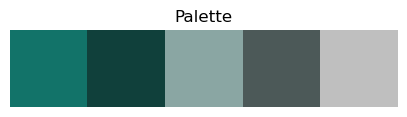

In [4]:
base_palette = ["#127369", "#10403B", "#8AA6A3", "#4C5958", "#BFBFBF"]
plt.figure(figsize=(8, 1))
sns.palplot(base_palette)
plt.title('Palette')
plt.axis('off')
plt.show()

In [5]:
additional_colors = ["#7E8C7B", "#495942", "#617355", "#B3BFAA", "#D2D9CC"]
# plt.figure(figsize=(8, 1))
# sns.palplot(additional_colors)
# plt.title('Palette 2')
# plt.axis('off')
# plt.show()

In [6]:
extended_palette = base_palette + additional_colors
color1 = base_palette[0]
color2 = base_palette[1]
color3 = base_palette[2]
color4 = base_palette[3]
color5 = base_palette[4]
color10 = extended_palette[9]
alternating_palette = [color2, color3]

## Editing Columns

In [7]:
# Adding columns and editing previous ones
df['additionalCosts'] = df.apply(
    lambda row: row['rentGross'] - row['rentNet'] if pd.notna(row['rentGross']) and pd.notna(row['rentNet']) else None,
    axis=1) # comment

df['additionalCosts/m2'] = df['additionalCosts'] / df['livingSpace']

df['CHF/m2'] = df['CHF/m2'].round(2)

df['yearBuilt'] = df['yearBuilt'].fillna(0).astype(int)
df['yearBuilt'] = df['yearBuilt'].replace(0, np.nan)

clean_string = lambda s: s.replace("[", "").replace("]", "").replace("'", "").replace('"', '') if isinstance(s, str) else s
df['type'] = df['type'].apply(clean_string)

In [8]:
df = df.drop('offerType', axis=1) # only rent
df = df.drop('region', axis=1) # only switzerland
df = df.drop('garden', axis=1) # comment
df = df.drop('currency', axis=1) # only CHF
df = df.drop('balcony', axis=1) # comment
df = df.drop('builtInKitchen', axis=1) # comment
df = df.drop('categories', axis=1) # comment

find(df,'additionalCosts', 5600)
be_nan(df, 'additionalCosts', 5600)

df = df[df['rentNet'] > 0]
# df['rentNet'].min()

## NaN
Showing the NaN variables visualy.

In [9]:
# !pip install missingno
# import missingno as msno # Visualization of nan values
# msno.matrix(df)
# plt.show()

## Stats

In [10]:
# Value counts for each column
for column in df.columns:
    print(f'Value counts for {column}')
    print(df[column].value_counts(), "\n")

Value counts for ID
ID
4000906965    1
4001139795    1
4001099153    1
4001104235    1
4001120347    1
             ..
4001133049    1
4001134937    1
4001132907    1
4001132906    1
4001140059    1
Name: count, Length: 825, dtype: int64 

Value counts for type
type
APARTMENT, FLAT             558
APARTMENT                   126
APARTMENT, ATTIC_FLAT        35
APARTMENT, ROOF_FLAT         34
APARTMENT, DUPLEX            32
HOUSE, SINGLE_HOUSE           8
APARTMENT, STUDIO             8
HOBBY_ROOM                    5
HOUSE, ROW_HOUSE              5
APARTMENT, LOFT               4
HOUSE, BIFAMILIAR_HOUSE       3
HOUSE, VILLA                  2
APARTMENT, BACHELOR_FLAT      1
APARTMENT, TERRACE_FLAT       1
SINGLE_HOUSE                  1
HOUSE, MULTIPLE_DWELLING      1
HOUSE, FARM_HOUSE             1
Name: count, dtype: int64 

Value counts for address
address
Av. des Cerisiers 2            13
Dammstrasse / Fabrikgasse       6
Am Stausee 23                   6
Rue de l'Ancienne Papeteri

In [11]:
# Describe for each column
for column in df.columns:
    print(f'Describe for {column}')
    print(df[column].describe(), "\n")

Describe for ID
count    8.250000e+02
mean     3.970934e+09
std      2.070479e+08
min      1.094589e+08
25%      4.001044e+09
50%      4.001110e+09
75%      4.001133e+09
max      4.001153e+09
Name: ID, dtype: float64 

Describe for type
count                 825
unique                 17
top       APARTMENT, FLAT
freq                  558
Name: type, dtype: object 

Describe for address
count                     728
unique                    620
top       Av. des Cerisiers 2
freq                       13
Name: address, dtype: object 

Describe for city
count        825
unique       356
top       Zürich
freq          48
Name: city, dtype: object 

Describe for postcode
count     825.000000
mean     5234.607273
std      2718.331166
min      1003.000000
25%      3110.000000
50%      4500.000000
75%      8136.000000
max      9602.000000
Name: postcode, dtype: float64 

Describe for lat
count    825.000000
mean      47.135234
std        0.426341
min       45.834932
25%       46.940362
50%  

### Analyzing Rental Properties Dataset

---


### 1. Exploring Property Types

Our dataset includes **825 rental properties** categorized into **17 unique types**. The most common type is **"Apartment, Flat"**, accounting for **558 properties**. This prevalence suggests a high demand for traditional apartment living. Here's a quick breakdown:

- **APARTMENT, FLAT**: 558
- **APARTMENT**: 126
- **APARTMENT, ATTIC_FLAT**: 35
- **APARTMENT, ROOF_FLAT**: 34
- **HOUSE, SINGLE_HOUSE**: 8

The variety in property types indicates a diverse market catering to different lifestyle preferences.

---

### 2. Identifying Popular Addresses

We analyzed **728 unique addresses** to find that **"Av. des Cerisiers 2"** stands out with **13 properties**. Other notable addresses include:

- **Dammstrasse / Fabrikgasse**: 6
- **Am Stausee 23**: 6
- **Rue de l'Ancienne Papeterie**: 5
- **Rue François-Guillimann 13**: 4

These popular addresses highlight areas with a higher density of rental properties, possibly indicating prime locations.

---

### 3. City-wise Distribution

The dataset covers properties across **356 cities**. **Zürich** leads the pack with **48 properties**, followed closely by **Basel** and **St. Gallen** with **36 properties** each. Here's the top five:

- **Zürich**: 48
- **Basel**: 36
- **St. Gallen**: 36
- **Bern**: 15
- **Lausanne**: 14

This distribution emphasizes major urban centers as hotspots for rental activities.

---

### 4. Postcode Insights

Postcodes range from **1003** to **9602**, providing a wide geographical spread. The median postcode around **4500** suggests a concentration in central regions.

---

### 5. Geographic Coordinates

Our dataset spans a broad geographic area:
- **Latitude**: 45.83° to 47.75°, averaging at 47.13°
- **Longitude**: 6.07° to 9.63°, with a mean of 7.97°

These coordinates cover both the northern and southern parts of the country, offering a comprehensive view of the rental market.

---

### 6. Rent Analysis

#### Net Rent

- **Average net rent**: **CHF 1910.93**
- **Range**: CHF **115** to **CHF 10000**
- **Median**: CHF **1691**

#### Gross Rent

- **Average gross rent**: **CHF 2145.23**
- **Range**: CHF **115** to **CHF 10500**
- **Median**: CHF **1928**

These figures illustrate the diversity in rental prices, catering to various budget segments.

---

### 7. Living Space

- **Average living space**: **92.38 m²**
- **Range**: **18 m²** to **330 m²**
- **Median**: **88 m²**

The wide range of living spaces highlights the different property sizes available to meet varied tenant needs.

---

### 8. Amenities and Features

- **Pets allowed**: **337 properties**
- **Flat-sharing community**: Predominantly **not** available (**147** properties not suitable, only **3** suitable)
- **Under Roof**: **123 properties are not under the roof, while **22** are
- **Balconies**: **485 properties**

Amenities play a crucial role in rental decisions, and our dataset reveals significant insights into these features.

---

### 9. Property Age and Renovation

- **New buildings**: **326 properties**
- **Average year built**: **1991**
- **Recent renovations**: Average year **2014**, with some as recent as **2024**

This mix of modern and older properties, along with recent renovations, indicates a dynamic market with ongoing developments.

---

### 10. Accessibility and Convenience

- **Garages**: **378 properties**
- **Parking**: **322 properties**
- **Elevators**: **442 properties**
- **Wheelchair accessible**: **141 properties**

Accessibility features are increasingly important for renters, and our dataset highlights their availability across various properties.

---

### 11. Distance to Key Locations

- **High schools**: Average distance **966.92 meters**
- **Kindergartens**: Average distance **534.15 meters**
- **Primary schools**: Average distance **734.32 meters**
- **Motorways**: Average distance **6276 meters**
- **Public transport**: Average distance **244.77 meters**

Proximity to educational institutions and public transport significantly impacts rental decisions, enhancing the desirability of properties.

---

### Final Thoughts

This comprehensive analysis of the rental properties dataset sheds light on key trends and insights. From diverse property types and rent prices to essential amenities and accessibility features, we now have a clearer picture of the rental market landscape. 

Thank you for joining us on this data journey! Up next, we'll transition to the visualizations phase in our Jupyter notebook to bring these insights to life. Stay tuned for some compelling visual stories!

For more details and further analysis, visit my GitHub repository. Feel free to reach out with any questions or suggestions. Let's continue exploring the fascinating world of rental properties together!

---

### Transition to Visualization Phase

Now, let's move on to the next exciting part of our analysis—visualizing these insights. We'll use various plots and charts to create a more intuitive understanding of the data. Let's get started!


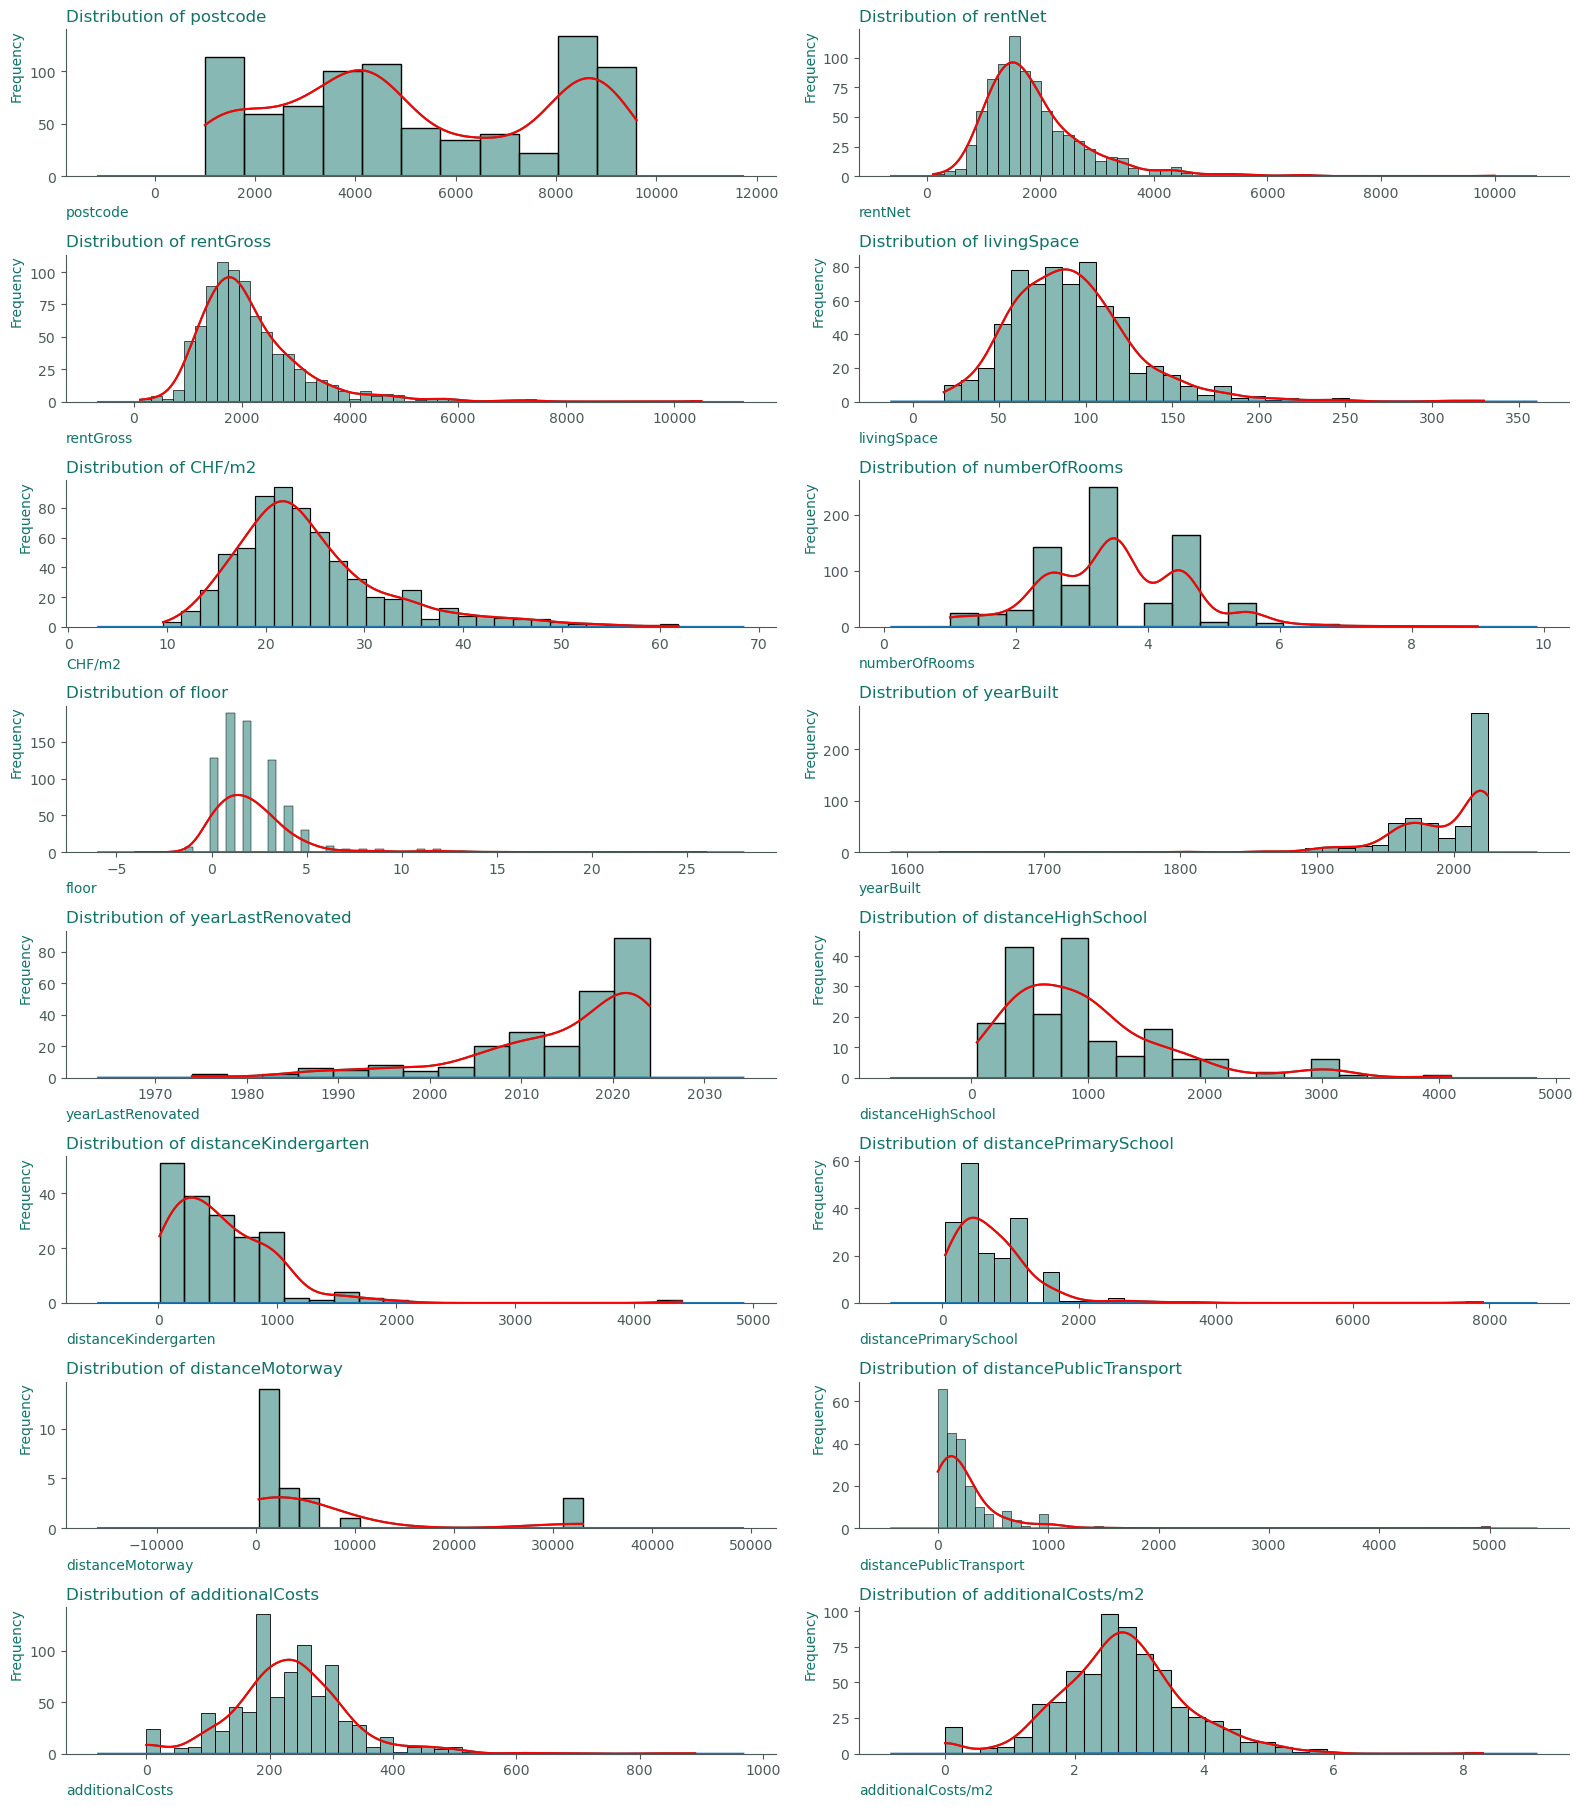

In [12]:
# Distribution plots
numeric_columns = [
    'postcode', 'rentNet', 'rentGross', 
    'livingSpace','CHF/m2', 'numberOfRooms', 'floor', 
    'yearBuilt', 'yearLastRenovated', 'distanceHighSchool',
    'distanceKindergarten', 'distancePrimarySchool', 'distanceMotorway',
    'distancePublicTransport', 'additionalCosts', 'additionalCosts/m2'
]

df_selected = df[numeric_columns]

# Select numeric columns
numeric_columns = df_selected.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(16, 20))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) // 2) + 1, 2, i)
    sns.histplot(df_selected[column].dropna(), kde=True, color=color1)
    
    # Add Trendline
    kde = sns.kdeplot(df_selected[column].dropna(), ax=plt.gca())
    x = kde.get_lines()[0].get_xdata()
    y = kde.get_lines()[0].get_ydata()
    plt.plot(x, y, linestyle='-', color='red')
    
    plt.title(f'Distribution of {column}', size=12, loc='left', color=color1)
    plt.xlabel(column, loc='left', color=color1)
    plt.ylabel('Frequency', loc='top', color=color1)
    plt.subplots_adjust(wspace=1.4, hspace=1.6)
    
    # Layout
    plt.gca().tick_params(axis='x', colors=color4)
    plt.gca().tick_params(axis='y', colors=color4)
    plt.gca().spines['bottom'].set_color(color4)
    plt.gca().spines['left'].set_color(color4)
    sns.despine()
    
plt.tight_layout()
plt.show()


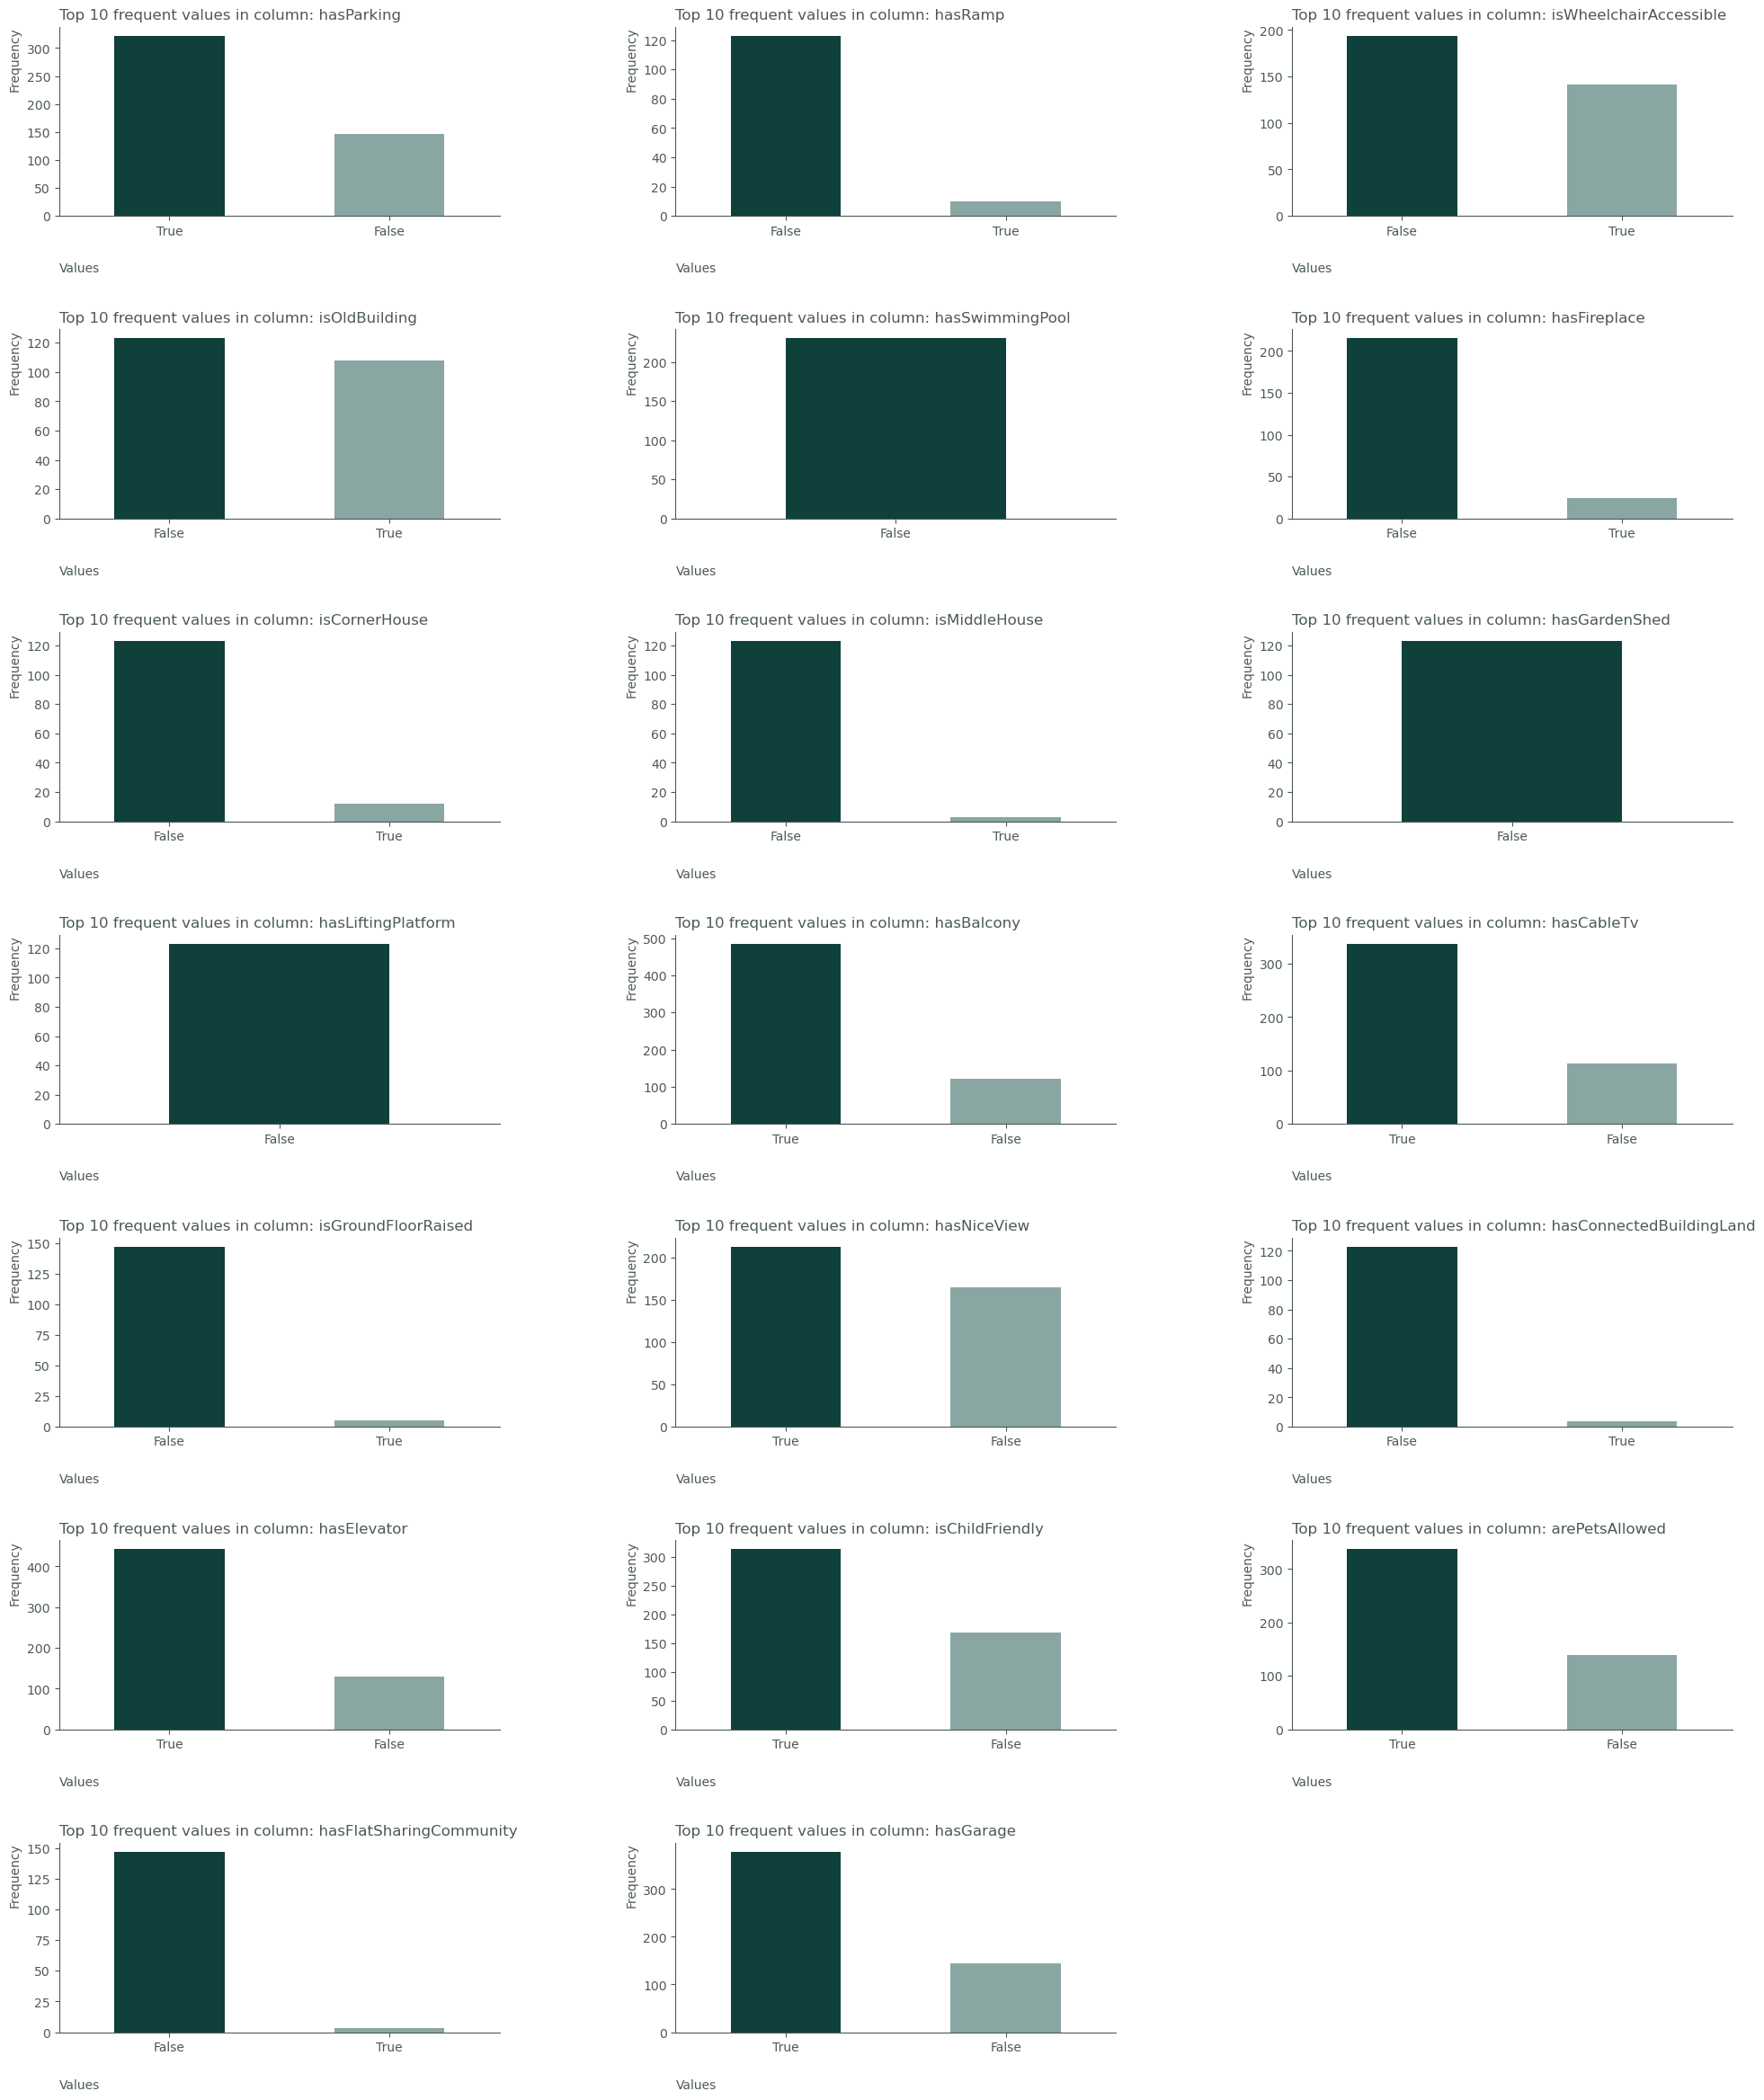

In [13]:
# True and false distribution
selected_columns = [
    'hasParking', 'hasRamp', 'isWheelchairAccessible', 'isOldBuilding',
    'hasSwimmingPool', 'hasFireplace', 'isCornerHouse', 'isMiddleHouse',
    'hasGardenShed', 'hasLiftingPlatform', 'hasBalcony', 'hasCableTv',
    'isGroundFloorRaised', 'hasNiceView', 'hasConnectedBuildingLand',
    'hasElevator', 'isChildFriendly', 'arePetsAllowed', 
    'hasFlatSharingCommunity', 'hasGarage'
]

plt.figure(figsize=(20, 24))

for i, column in enumerate(selected_columns, 1):
    plt.subplot(7, 3, i) 
    vs = df[column].value_counts()
    
    top_10 = vs.head(10)
    
    top_10.plot(kind='bar', color=alternating_palette)
    
    plt.title(f'Top 10 frequent values in column: {column}', loc='left', color=color4)
    plt.xlabel('Values', labelpad=20, loc='left', color=color4)
    plt.ylabel('Frequency', loc='top', color=color4)
    plt.xticks(rotation=0, ha='center')    
    plt.grid(False)  # Disable the grid

    
    # Layout
    plt.gca().tick_params(axis='x', colors=color4)
    plt.gca().tick_params(axis='y', colors=color4)
    plt.gca().spines['bottom'].set_color(color4)
    plt.gca().spines['left'].set_color(color4)
    sns.despine()

plt.tight_layout(pad=3.0)
plt.subplots_adjust(wspace=0.4, hspace=0.6) 
plt.show()


## Geographics

C:\Users\acer\AppData\Local\Temp\ipykernel_13564\472059955.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


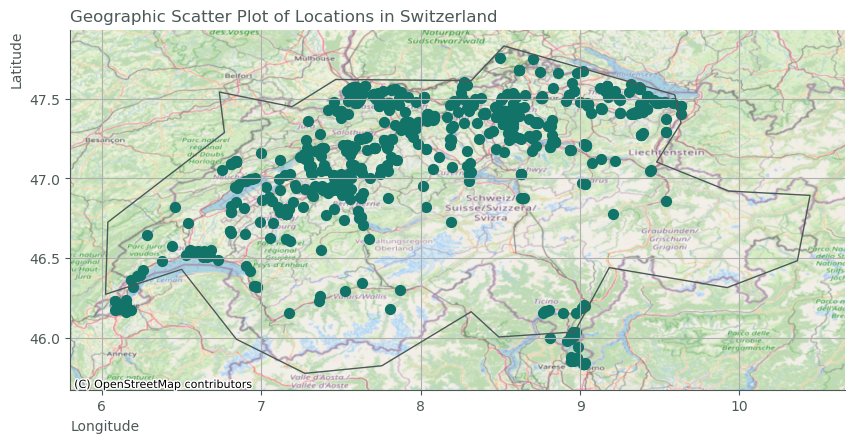

In [14]:
# !pip install geopandas contextily matplotlib # uncomment for download
import geopandas as gpd
import contextily as ctx
%matplotlib inline

# Convert the DataFrame into a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326")

# Loading the world map and filtering Switzerland
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
switzerland = world[world.name == "Switzerland"]

fig, ax = plt.subplots(figsize=(10, 8))
switzerland.boundary.plot(ax=ax, linewidth=1, edgecolor=color4)
gdf.plot(ax=ax, color=color1, markersize=50)

# Add OpenStreetMap tiles
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Labels and Title
plt.title('Geographic Scatter Plot of Locations in Switzerland', loc='left', color=color4)
plt.xlabel('Longitude', loc='left', color=color4)
plt.ylabel('Latitude', loc='top', color=color4)
plt.grid(True)

# Layout
plt.gca().tick_params(axis='x', colors=color4)
plt.gca().tick_params(axis='y', colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

plt.show()

Swiss Postcode Dataset has been collected from: https://www.swisstopo.admin.ch/de/amtliches-ortschaftenverzeichnis

In [15]:
# Creating canton columns in accorance to the dataset
post = pd.read_csv('AMTOVZ_CSV_LV95.csv', delimiter=';') 
# Extract the 'PLZ' and 'Kantonskürzel' columns
postc = post[['PLZ', 'Kantonskürzel']]

# Create a dictionary to map postal codes to cantons
postcode_to_canton = dict(zip(postc['PLZ'].astype(str), postc['Kantonskürzel']))
df['postcode'] = df['postcode'].astype(str)

# Map the postal codes to cantons
df['canton'] = df['postcode'].map(postcode_to_canton)

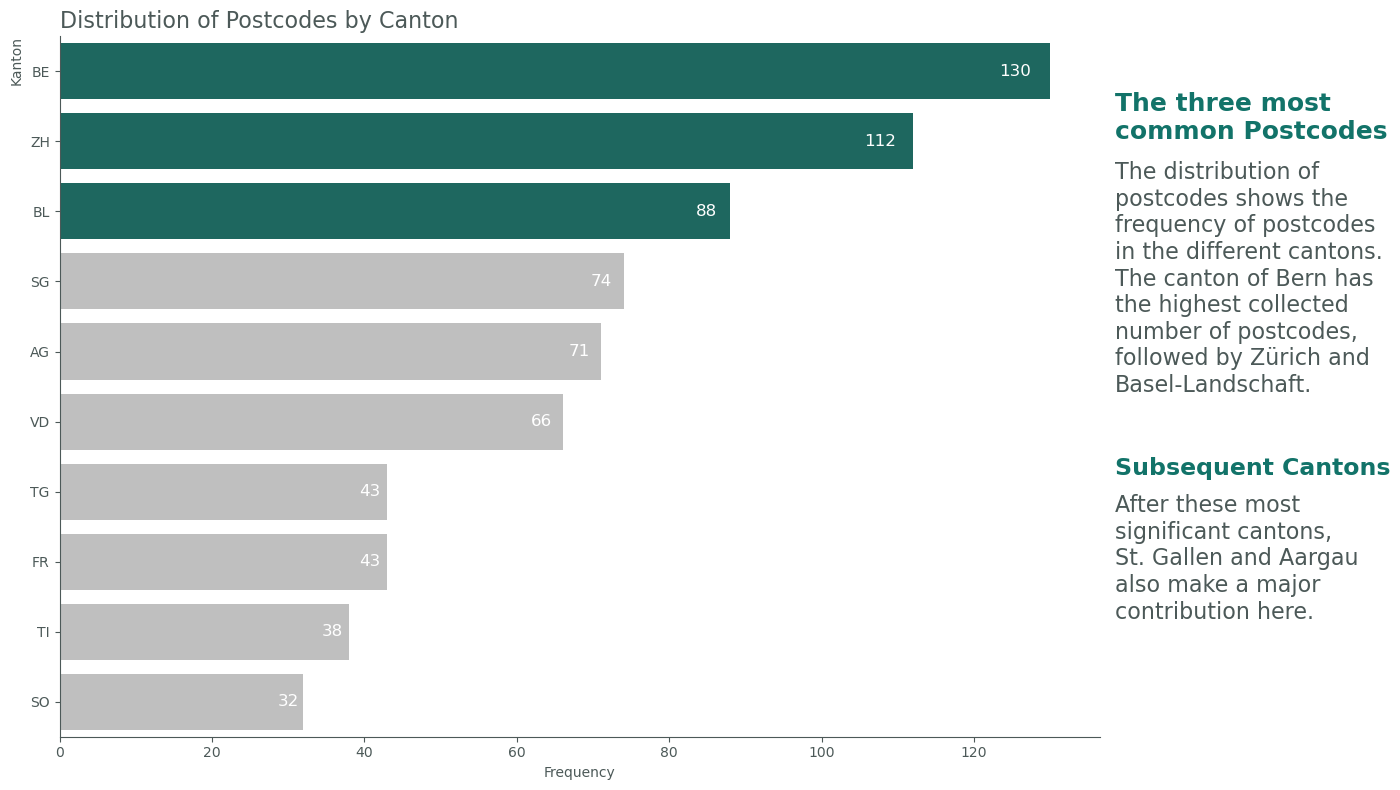

In [16]:
kanton_counts = df['canton'].value_counts().sort_values(ascending=False)
top_10_kantons = kanton_counts.head(10)

fig, ax = plt.subplots(figsize=(14, 8))

highlight_count = 3

bars = sns.barplot(
    y=top_10_kantons.index, 
    x=top_10_kantons.values, 
    palette=["#127369" if i < highlight_count else "#BFBFBF" for i in range(len(top_10_kantons))]
)

# Creates values text on columns
for index, value in enumerate(top_10_kantons.values):
    plt.text(value - 0.02 * value, index, f'{value}', va='center', ha='right', color='white', fontsize=12)

# Labels and Title
plt.title('Distribution of Postcodes by Canton', size=16, loc='left', color=color4)
plt.xlabel('Frequency', loc='center', color=color4)
plt.ylabel('Kanton', loc='top', color=color4)

# Layout
plt.gca().tick_params(axis='x', colors=color4)
plt.gca().tick_params(axis='y', colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

# Titel and Description
title = "The three most common Postcodes"
description = '''
The distribution of postcodes shows the frequency of postcodes in the different cantons. 
The canton of Bern has the highest collected number of postcodes, followed by Zürich and Basel-Landschaft.
'''
plt.figtext(0.8, 0.825, title, wrap=True, weight='bold', horizontalalignment='left', fontsize=18, color=color1)
plt.figtext(0.8, 0.475, description, wrap=True, horizontalalignment='left', fontsize=16, color=color4)

subsequent_title = "Subsequent Cantons"
subsequent_description = '''After these most significant cantons, 
St. Gallen and Aargau also make a major contribution here.'''

plt.figtext(0.8, 0.4, subsequent_title, wrap=True, weight='bold', horizontalalignment='left', fontsize=17, color=color1)
plt.figtext(0.8, 0.225, subsequent_description, wrap=True, horizontalalignment='left', fontsize=16, color=color4)

# Adjusting Layout
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Platz für die Beschreibung auf der rechten Seite lassen
plt.show()

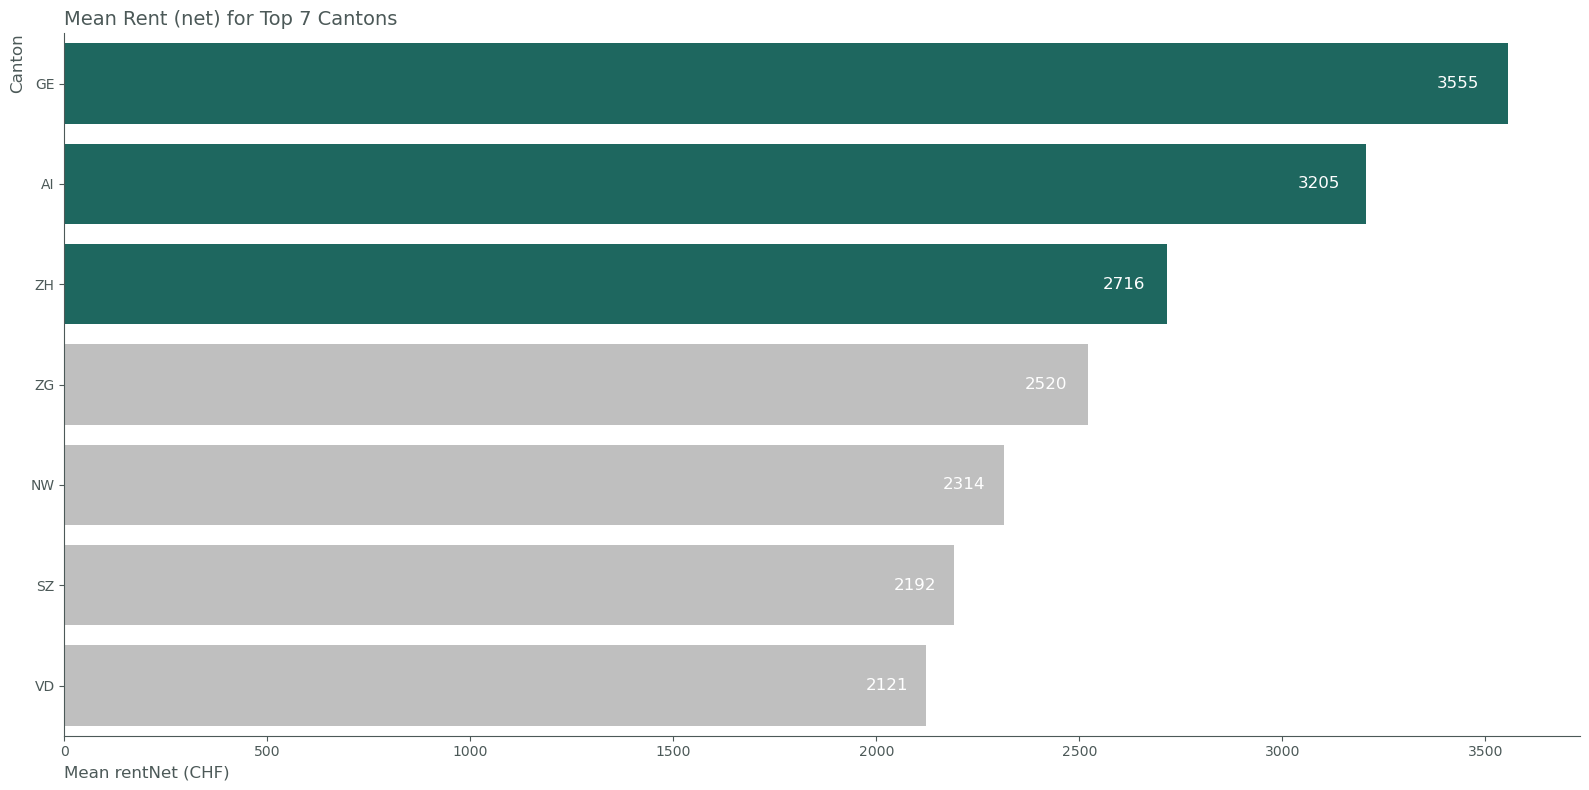

In [17]:
# Assuming 'df' is your DataFrame
colors = [color1, color1, color1, color5, color5, color5, color5, color5, color5, color5]

# Group by canton and calculate mean rentNet
mean_rent_by_canton = round(df.groupby('canton')['rentNet'].mean()).astype(int)

# Get the top 10 cantons by mean rentNet
top_7_cantons = mean_rent_by_canton.nlargest(7)

# Plot the results
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=top_7_cantons.values, y=top_7_cantons.index, palette=colors, linewidth=0.6)

# Creates values text on columns
for index, value in enumerate(top_7_cantons.values):
    plt.text(value - 0.02 * value, index, f'{int(value)}', va='center', ha='right', color='white', fontsize=12)

# Labels and Title
plt.title('Mean Rent (net) for Top 7 Cantons', size=14, loc='left', color=color4)
plt.xlabel('Mean rentNet (CHF)', size=12, loc='left', color=color4)
plt.ylabel('Canton', size=12, loc='top', color=color4)

# Layout
ax.tick_params(axis='x', colors=color4)
ax.tick_params(axis='y', colors=color4)
ax.spines['bottom'].set_color(color4)
ax.spines['left'].set_color(color4)
sns.despine()

plt.tight_layout()
plt.show()


## Living space

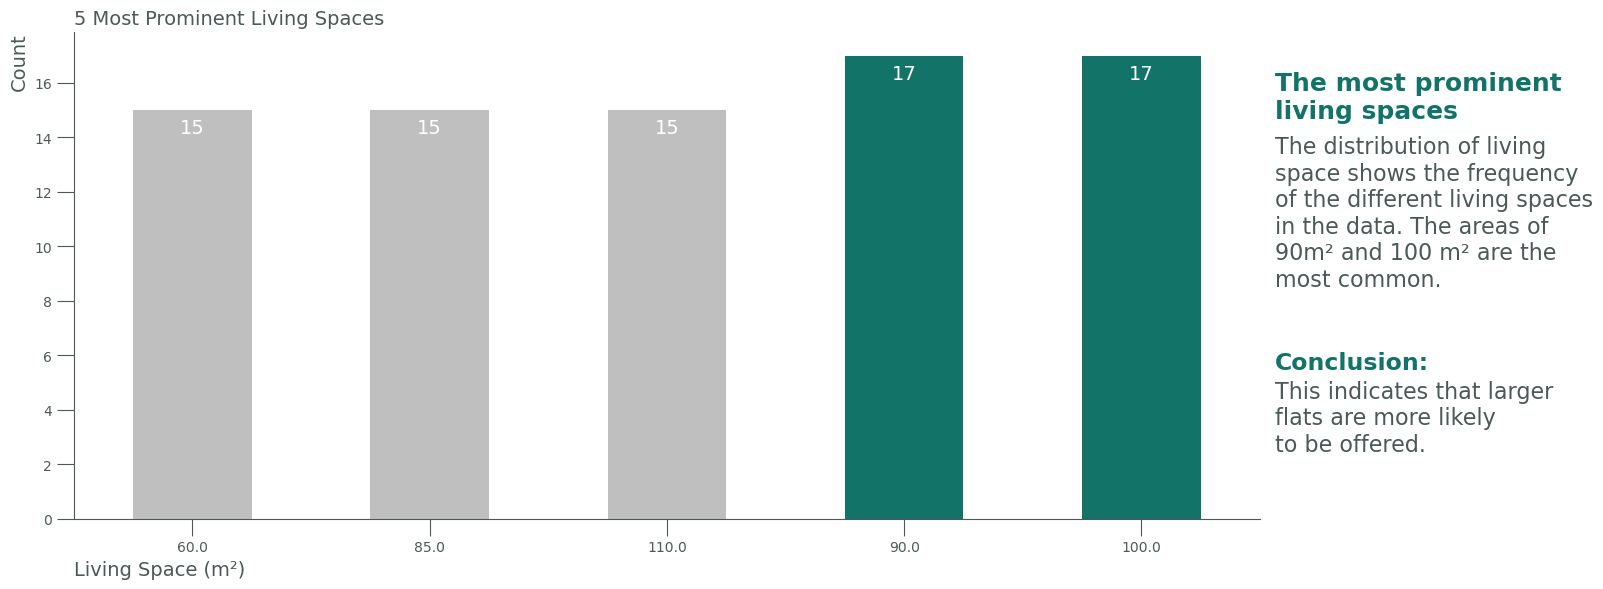

In [18]:
# Select Top 5 of living space
vs = df['livingSpace'].value_counts()
top_5 = vs.head(5).sort_values(ascending=True)

mix = [color5 , color5, color5, color1, color1] # Colors

plt.figure(figsize=(16, 6))
top_5.plot(kind='bar', color=mix)

# Add value text on barplot
for index, value in enumerate(top_5):
    plt.text(index, value - 1 , str(value), va='bottom', ha='center', color='white', size=14)

# Labels and Title
plt.title('5 Most Prominent Living Spaces', size=14, loc='left', color=color4)
plt.xlabel('Living Space (m²)', loc='left', size=14, color=color4)
plt.ylabel('Count', loc='top', size=14, color=color4)

# Layout
plt.gca().tick_params(axis='x', size=12,rotation=0, colors=color4)
plt.gca().tick_params(axis='y', size=12, colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

# Title and Description
title = '''The most prominent
living spaces'''
description = '''The distribution of living 
space shows the frequency
of the different living spaces 
in the data. The areas of 
90m² and 100 m² are the most common.
'''
plt.figtext(0.8, 0.8, title, wrap=True, horizontalalignment='left', fontsize=18, weight='bold', color=color1)
plt.figtext(0.8, 0.475, description, wrap=True, horizontalalignment='left', fontsize=16, color=color4)

conclusion_title = 'Conclusion:'
conclusion = '''This indicates that larger flats are more likely
to be offered.
'''
plt.figtext(0.8, 0.375, conclusion_title, wrap=True, horizontalalignment='left', fontsize=17, weight='bold', color=color1)
plt.figtext(0.8, 0.2, conclusion, wrap=True, horizontalalignment='left', fontsize=16, color=color4)

# Adjust Layout
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space on the right side
plt.show()

## Correlation matrix

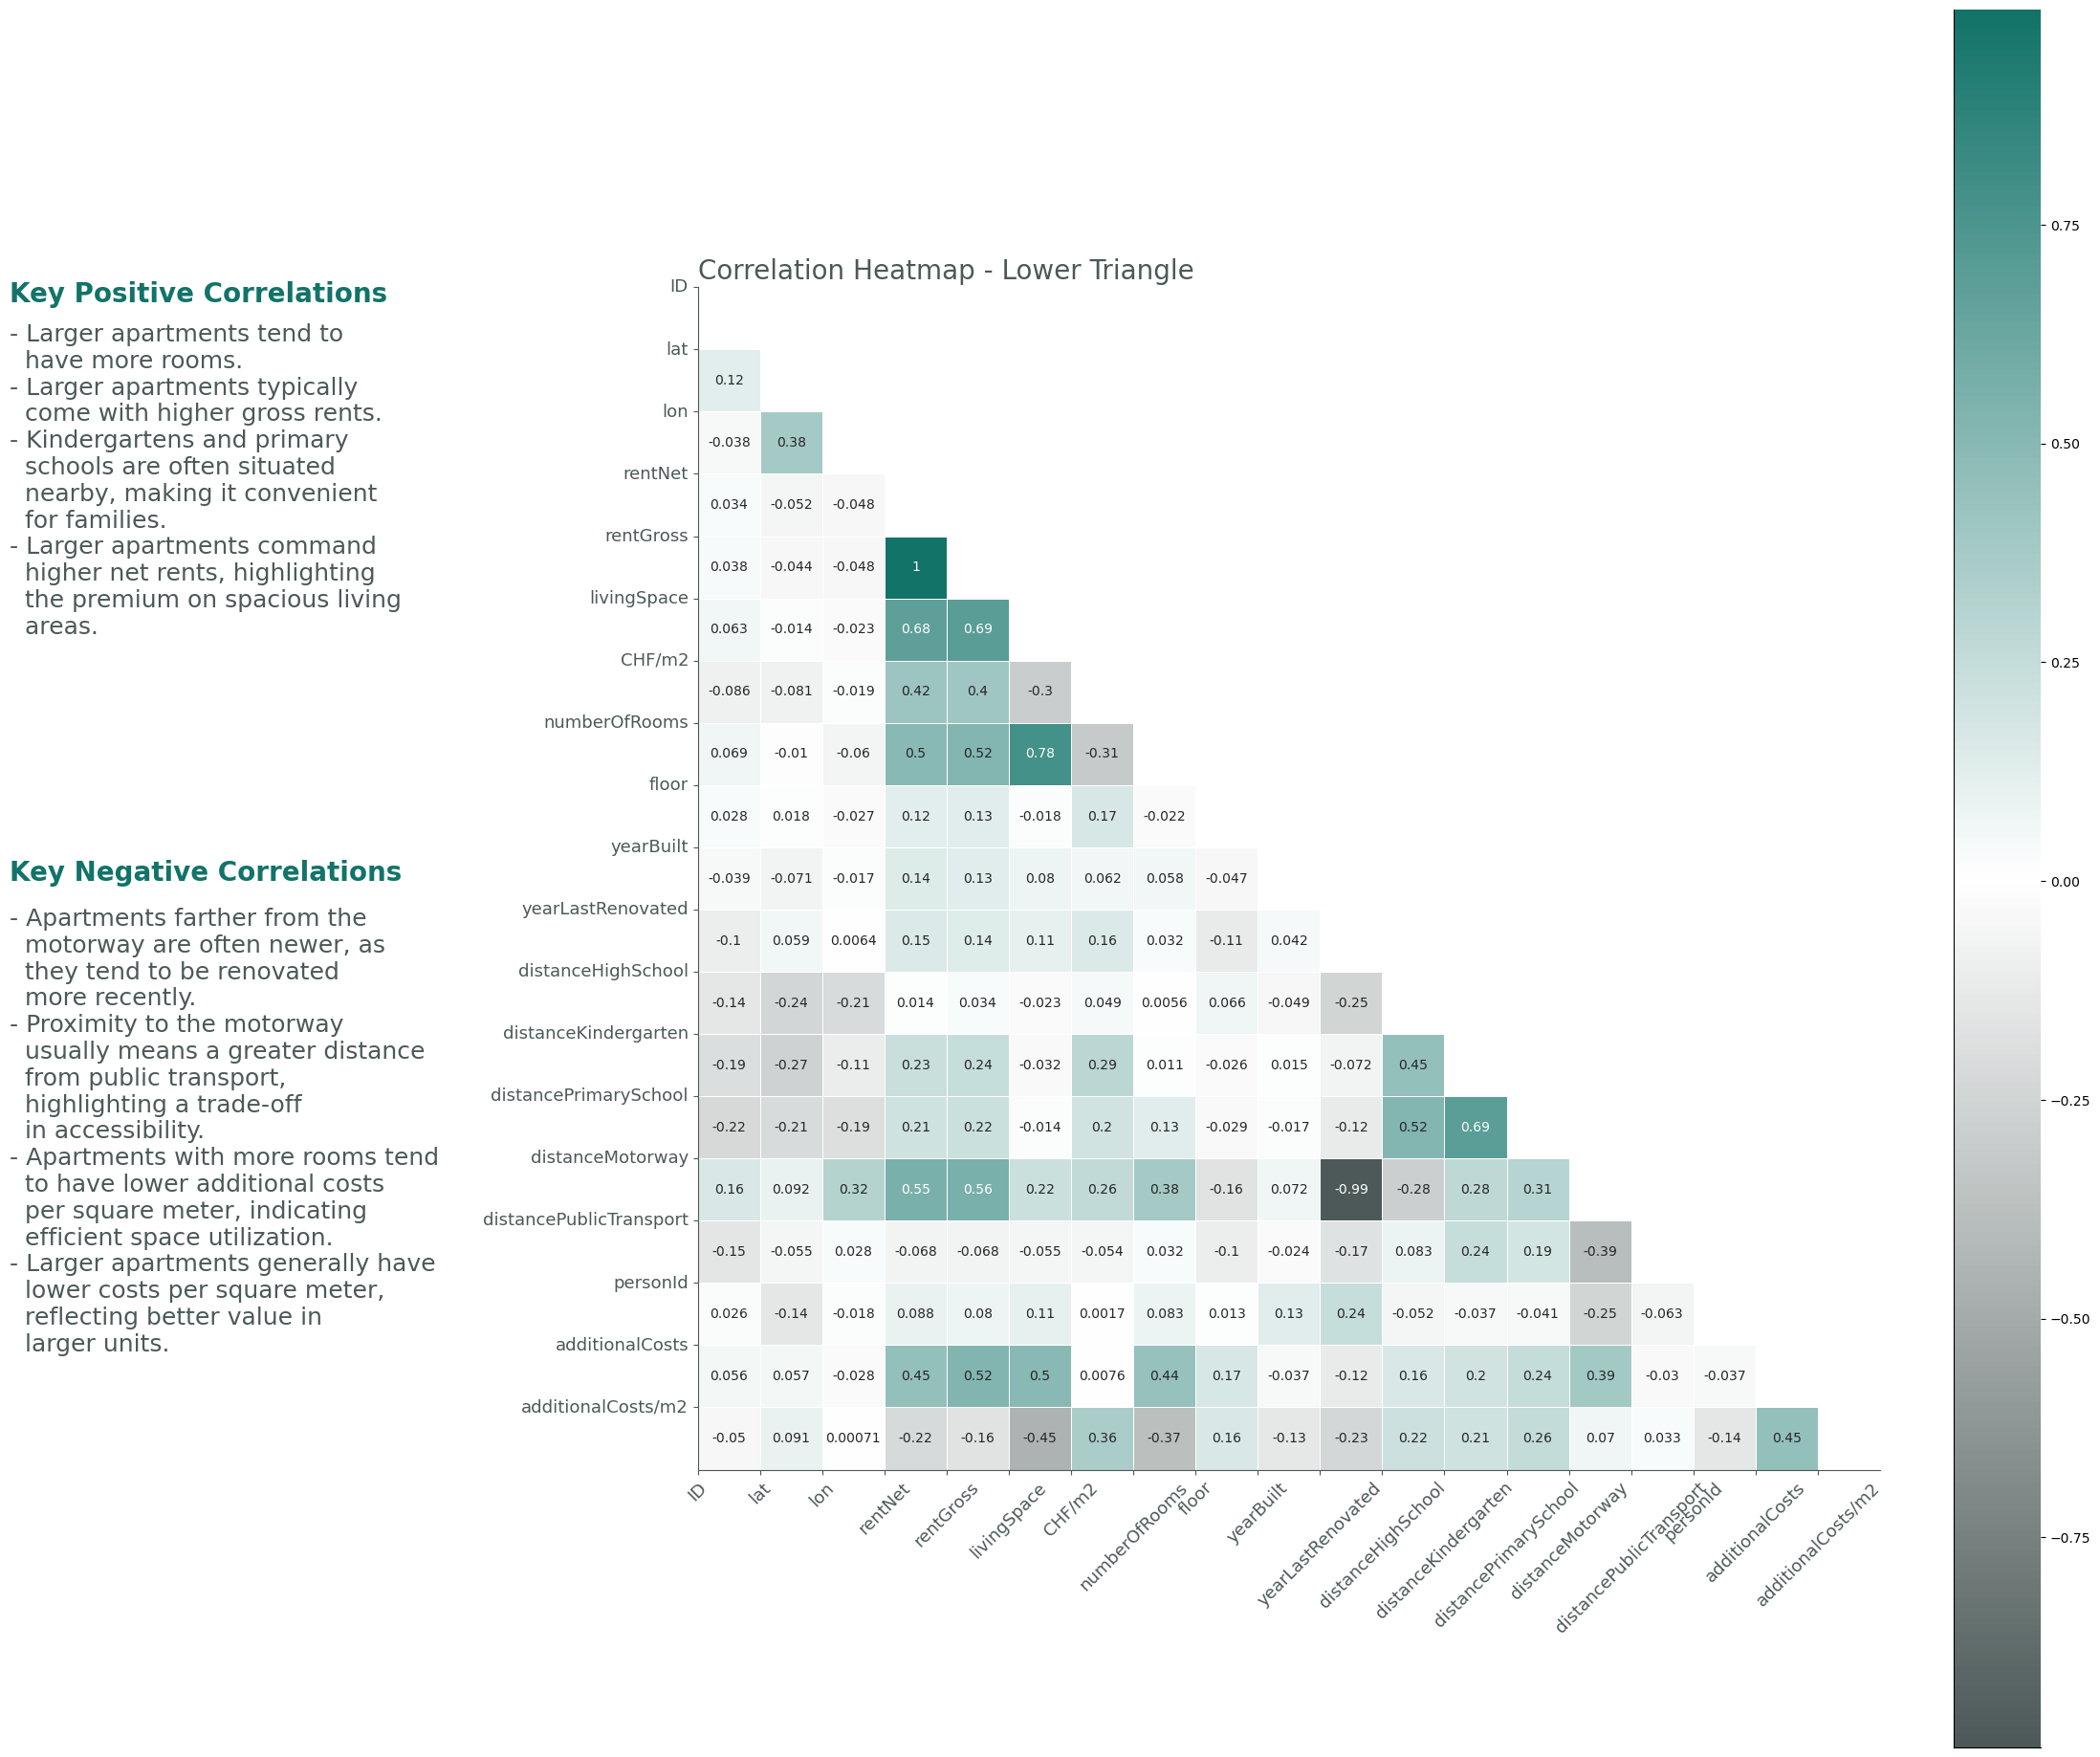

In [19]:
from matplotlib.colors import LinearSegmentedColormap

# Define your own colors
custom_colors = [color4, "#ffffff", color1]  # Negative correlation to positive correlation

# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

numeric_columns = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(24, 20))  # Larger figure

# Draw heatmap with the mask
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, center=0, linewidths=0.5, linecolor='white', square=True, mask=mask, ax=ax)

ax.set_title('Correlation Heatmap - Lower Triangle', size=20, color=color4, loc='left')
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, fontsize=13, rotation=45, color=color4)
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticklabels(correlation_matrix.columns, fontsize=13, color=color4)

# Layout
ax.tick_params(axis='x', colors=color4)
ax.tick_params(axis='y', colors=color4)
ax.spines['bottom'].set_color(color4)
ax.spines['left'].set_color(color4)
sns.despine()

# Positive Correlations Description
title_positiv = 'Key Positive Correlations'
positive_description = '''
- Larger apartments tend to 
  have more rooms.
- Larger apartments typically 
  come with higher gross rents.
- Kindergartens and primary 
  schools are often situated 
  nearby, making it convenient 
  for families.
- Larger apartments command 
  higher net rents, highlighting 
  the premium on spacious living 
  areas.
'''

fig.text(0.05, 0.8375, title_positiv, fontsize=20, weight='bold', horizontalalignment='left', color=color1)
fig.text(0.05, 0.65, positive_description, fontsize=18, horizontalalignment='left', color=color4)

# Negative Correlations Description
title_negativ = 'Key Negative Correlations'
negative_description = '''
- Apartments farther from the
  motorway are often newer, as 
  they tend to be renovated 
  more recently.
- Proximity to the motorway 
  usually means a greater distance 
  from public transport, 
  highlighting a trade-off 
  in accessibility.
- Apartments with more rooms tend 
  to have lower additional costs 
  per square meter, indicating 
  efficient space utilization.
- Larger apartments generally have 
  lower costs per square meter, 
  reflecting better value in 
  larger units.
'''

fig.text(0.05, 0.535, title_negativ, fontsize=20, weight='bold', horizontalalignment='left', color=color1)
fig.text(0.05, 0.275, negative_description, fontsize=18, horizontalalignment='left', color=color4)

plt.tight_layout(rect=[0.25, 0, 1, 1])  # Leave space on the left side

plt.show()


### Correlation matrix output
Show the values of the correlationmatrix as pure text.

In [20]:
# # Calculate the correlation matrix
# numeric_columns = df.select_dtypes(include=[np.number])
# correlation_matrix = numeric_columns.corr()

# # Code for extracting and printing the correlations
# corr_list = correlation_matrix.unstack().reset_index()
# corr_list.columns = ['Feature1', 'Feature2', 'Correlation']
# corr_list = corr_list[corr_list['Feature1'] != corr_list['Feature2']]
# corr_list = corr_list.drop_duplicates(subset=['Correlation'])
# corr_list = corr_list.sort_values(by='Correlation', ascending=False).reset_index(drop=True)
# print(corr_list)

## Distribution of building year

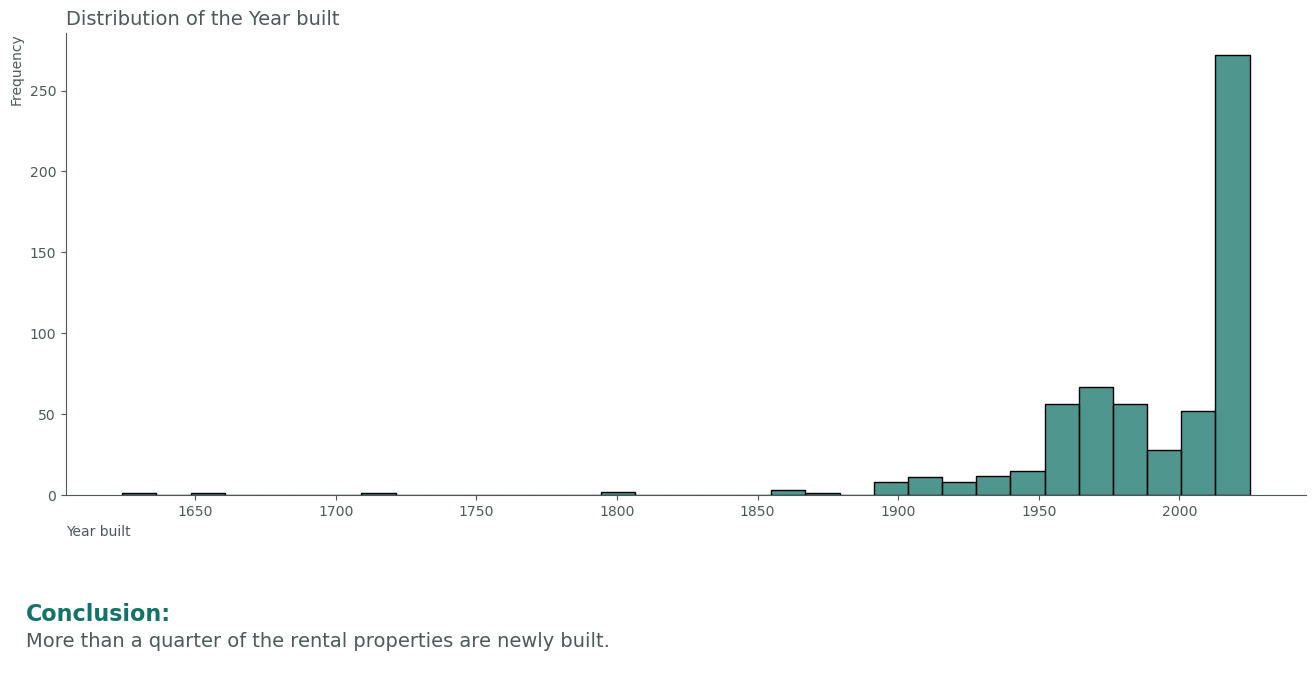

In [21]:
plt.figure(figsize=(16, 6))

sns.histplot(df['yearBuilt'].dropna(), color=color1)

# Labels and Title
plt.title('Distribution of the Year built', size=14, loc='left', color=color4)
plt.xlabel('Year built', loc='left', color=color4)
plt.ylabel('Frequency', loc='top', color=color4)

# Layout
plt.gca().tick_params(axis='x', colors=color4)
plt.gca().tick_params(axis='y', colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

conclusion = '''More than a quarter of the rental properties are newly built.
'''

# Add description
plt.figtext(0.1, -0.1, 'Conclusion:', weight='bold', wrap=True, horizontalalignment='left', fontsize=16, color=color1)
plt.figtext(0.1, -0.175, conclusion, wrap=True, horizontalalignment='left', fontsize=14, color=color4)

plt.show()

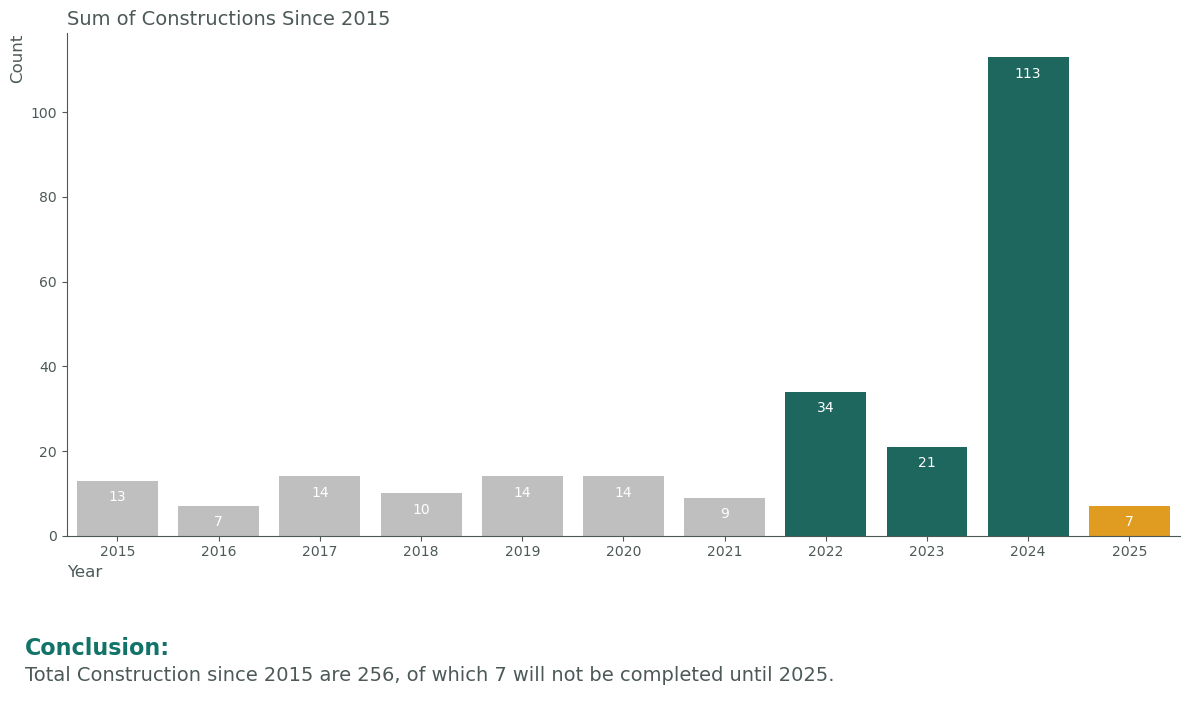

In [22]:
# Filter for renovations since 2015
construction_since_2015 = round(df[df['yearBuilt'] >= 2015]['yearBuilt'].value_counts().sort_index())
total_construction_since_2015 = df[df['yearBuilt'] >= 2015]['yearBuilt'].count()

colors = [color5, color5, color5, color5, color5, color5, color5, color1, color1, color1, 'orange']

plt.figure(figsize=(12, 6))
sns.barplot(x=[str(int(year)) for year in construction_since_2015.index], y=construction_since_2015.values, palette=colors)

# Add value text to bars
for index, value in enumerate(construction_since_2015.values):
    plt.text(index, value - 5.5, str(value), va='bottom', ha='center', color='white')

# Labels and Title
plt.title('Sum of Constructions Since 2015', size=14, loc='left', color=color4)
plt.xlabel('Year', size=12, loc='left', color=color4)
plt.ylabel('Count', size=12, loc='top', color=color4)

# Layout
plt.gca().tick_params(axis='x', colors=color4)
plt.gca().tick_params(axis='y', colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

conclusion = f'''Total Construction since 2015 are {total_construction_since_2015}, of which 7 will not be completed until 2025.
'''

# Add description
plt.figtext(0.025, -0.1, 'Conclusion:', weight='bold', wrap=True, horizontalalignment='left', fontsize=16, color=color1)
plt.figtext(0.025, -0.175, conclusion, wrap=True, horizontalalignment='left', fontsize=14, color=color4)

plt.tight_layout()
plt.show()


## Distribution of renovation year

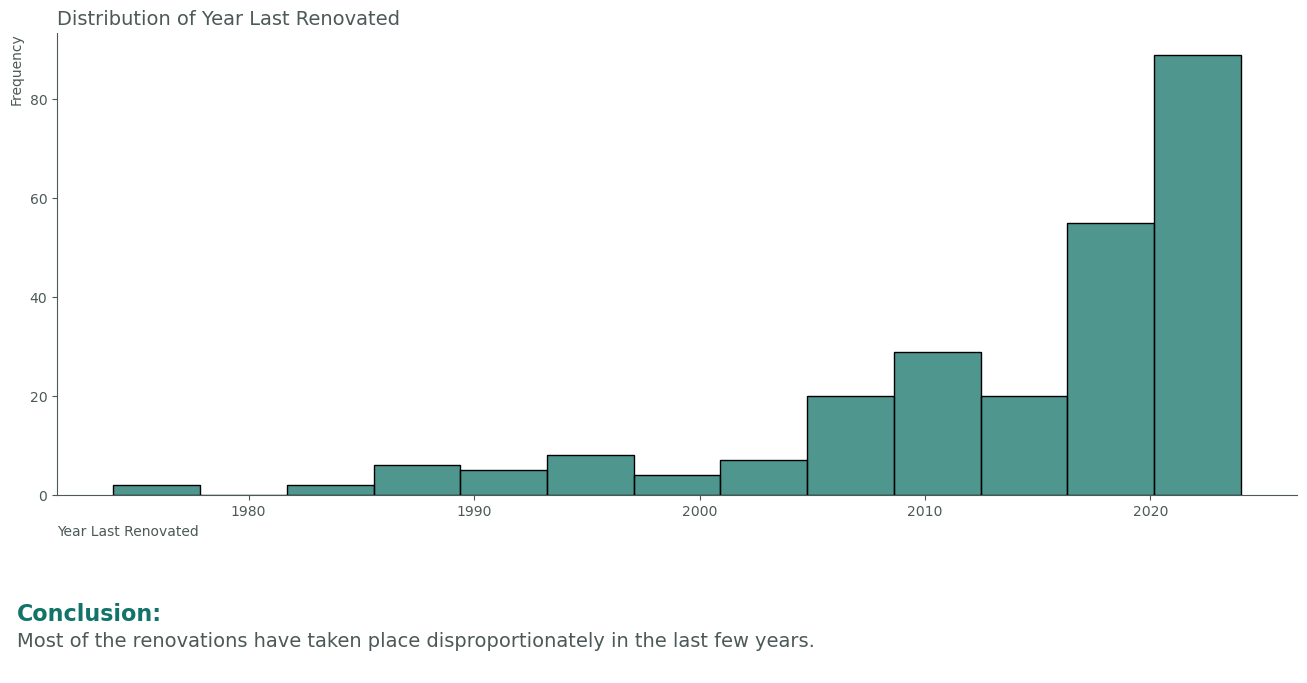

In [23]:
plt.figure(figsize=(16, 6))

# Plot histogram with KDE
sns.histplot(df['yearLastRenovated'].dropna(), color=color1)

# Labels and Title
plt.title('Distribution of Year Last Renovated', size=14 , loc='left', color=color4)
plt.xlabel('Year Last Renovated', loc='left', color=color4)
plt.ylabel('Frequency', loc='top', color=color4)

# Layout
plt.gca().tick_params(axis='x', colors=color4)
plt.gca().tick_params(axis='y', colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

conclusion = '''Most of the renovations have taken place disproportionately in the last few years.
'''

# Add description
plt.figtext(0.1, -0.1, 'Conclusion:', weight='bold', wrap=True, horizontalalignment='left', fontsize=16, color=color1)
plt.figtext(0.1, -0.175, conclusion, wrap=True, horizontalalignment='left', fontsize=14, color=color4)

plt.show()

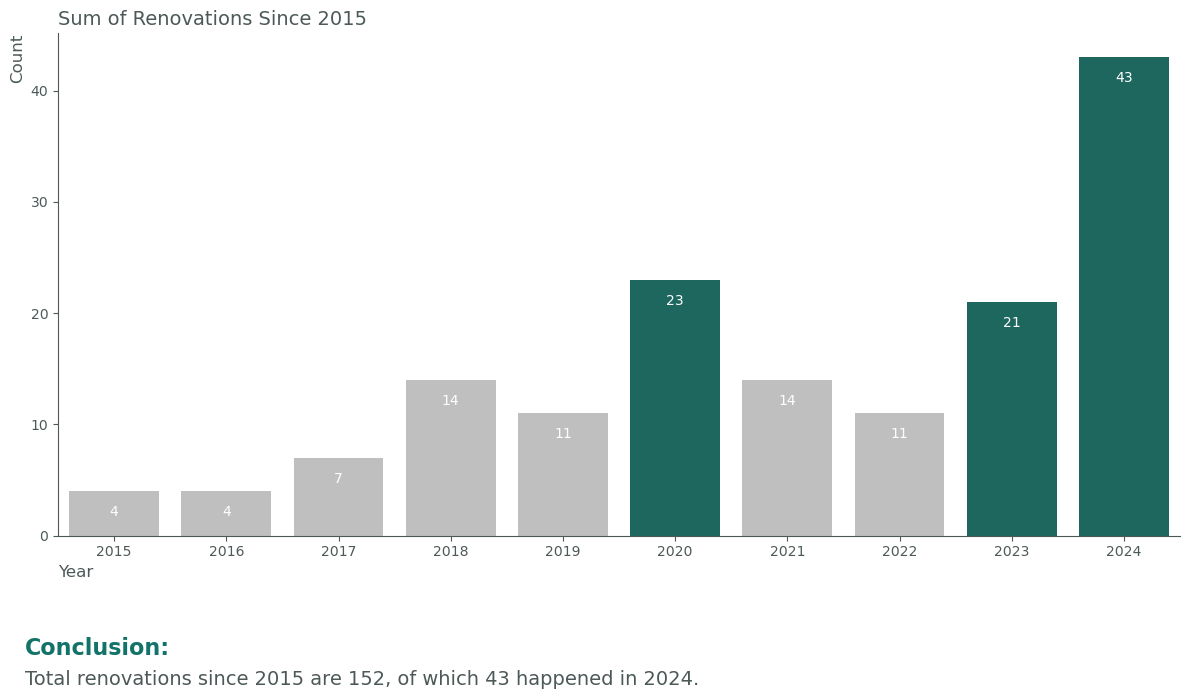

In [24]:
renovations_since_2015 = df[df['yearLastRenovated'] >= 2015]['yearLastRenovated'].value_counts().sort_index()
total_renovations_since_2015 = df[df['yearLastRenovated'] >= 2015]['yearLastRenovated'].count()

colors = [color5, color5, color5, color5, color5, color1, color5, color5, color1, color1]

plt.figure(figsize=(12, 6))
sns.barplot(x=[str(int(year)) for year in renovations_since_2015.index], y=renovations_since_2015.values, palette=colors)

# Add value text to bars
for index, value in enumerate(renovations_since_2015.values):
    plt.text(index, value - 2.5, str(value), va='bottom', ha='center', color='white')

# Labels and Title
plt.title('Sum of Renovations Since 2015', size=14, loc='left', color=color4)
plt.xlabel('Year', size=12, loc='left', color=color4)
plt.ylabel('Count', size=12, loc='top', color=color4)

# Layout
plt.gca().tick_params(axis='x', colors=color4)
plt.gca().tick_params(axis='y', colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

conclusion = f'Total renovations since 2015 are {total_renovations_since_2015}, of which 43 happened in 2024.'

# Add description
plt.figtext(0.025, -0.1, 'Conclusion:', weight='bold', wrap=True, horizontalalignment='left', fontsize=16, color=color1)
plt.figtext(0.025, -0.15, conclusion, wrap=True, horizontalalignment='left', fontsize=14, color=color4)

plt.tight_layout()
plt.show()


## Price trend

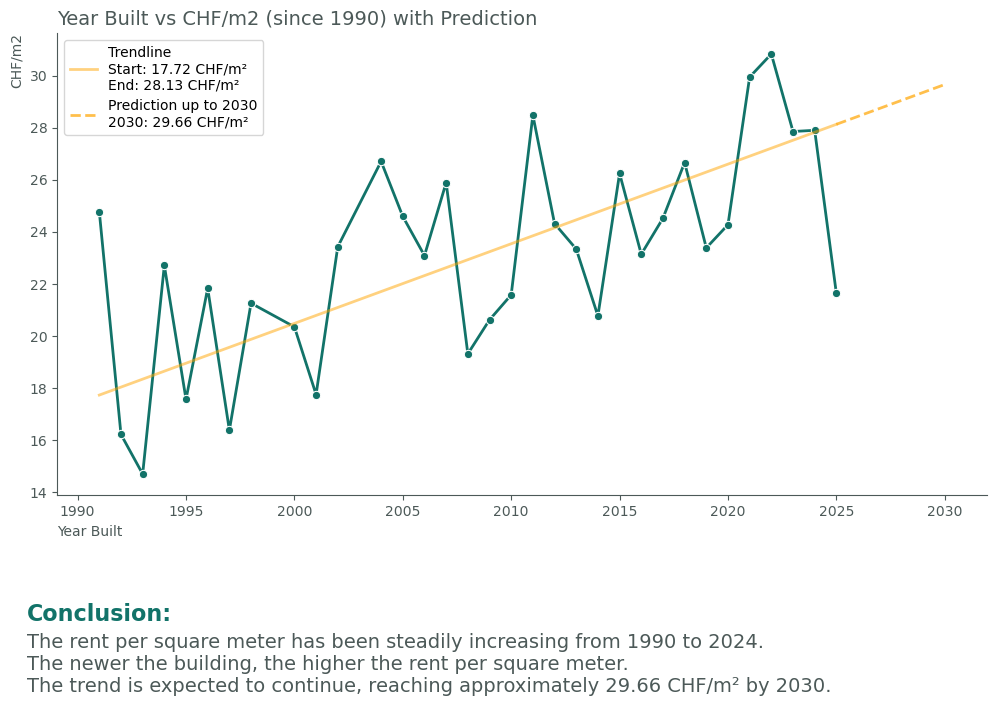

In [25]:
from sklearn.linear_model import LinearRegression

# Filter the data from 1990
df_filtered = df[df['yearBuilt'] >= 1990] # Select starting year to plot

# Drop NaN values
df_filtered = df_filtered.dropna(subset=['yearBuilt', 'CHF/m2'])

# Sort data by yearBuilt to ensure correct trendline calculation
df_filtered = df_filtered.sort_values(by='yearBuilt')

# Perform a linear regression
x = df_filtered['yearBuilt'].values.reshape(-1, 1)
y = df_filtered['CHF/m2'].values

# Make sure there is enough variance
if len(np.unique(x)) > 1 and len(np.unique(y)) > 1:
    model = LinearRegression().fit(x, y)
    trendline = model.predict(x)
else:
    trendline = [y.mean()] * len(x)

# Predict future values up to 2030
future_years = np.arange(2025, 2031).reshape(-1, 1)
future_trendline = model.predict(future_years)

# Calculate start and end prices
start_price = trendline[0]
end_price = trendline[-1]

plt.figure(figsize=(12, 6))

# Plot the line chart without error bars
sns.lineplot(x='yearBuilt', y='CHF/m2', data=df_filtered, color="#127369", linewidth=2, marker='o', err_style='bars', errorbar=None)

# Trendline
plt.plot(df_filtered['yearBuilt'], trendline, color='orange', linewidth=2, alpha=0.5,
         label=f'Trendline\nStart: {start_price:.2f} CHF/m²\nEnd: {end_price:.2f} CHF/m²')

# Future trendline
plt.plot(future_years, future_trendline, color='orange', linestyle='--', linewidth=2, alpha=0.7,
         label=f'Prediction up to 2030\n2030: {future_trendline[-1]:.2f} CHF/m²')

# Labels and Title
plt.title('Year Built vs CHF/m2 (since 1990) with Prediction', size=14, loc='left', color=color4)
plt.xlabel('Year Built', loc='left', color=color4)
plt.ylabel('CHF/m2', loc='top', color=color4)

# Layout
plt.gca().tick_params(axis='x', colors=color4)
plt.gca().tick_params(axis='y', colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

conclusion = '''The rent per square meter has been steadily increasing from 1990 to 2024. 
The newer the building, the higher the rent per square meter. 
The trend is expected to continue, reaching approximately {:.2f} CHF/m² by 2030.
'''.format(future_trendline[-1])

# Add description
plt.figtext(0.1, -0.1, 'Conclusion:', weight='bold', wrap=True, horizontalalignment='left', fontsize=16, color=color1)
plt.figtext(0.1, -0.25, conclusion, wrap=True, horizontalalignment='left', fontsize=14, color=color4)


plt.legend()
plt.show()


## Average rent

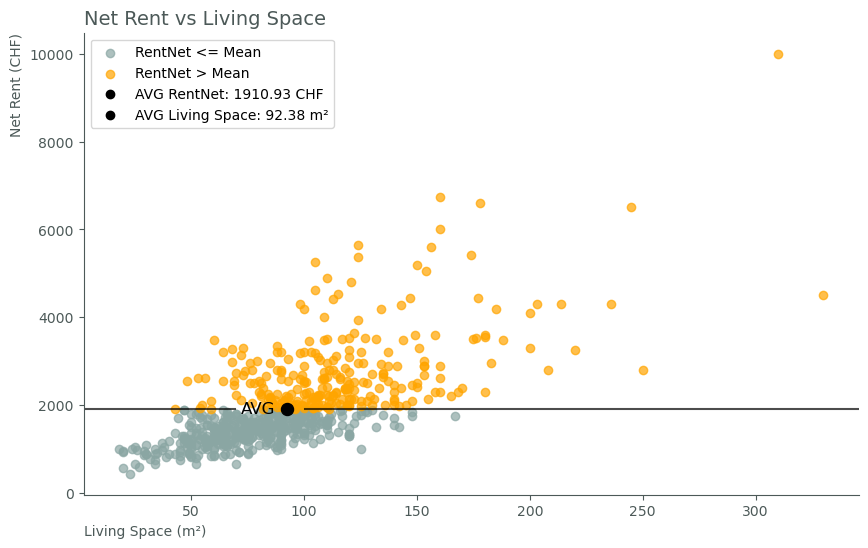

In [26]:
mean_rentNet = df['rentNet'].mean()
mean_livingSpace = df['livingSpace'].mean()

plt.figure(figsize=(10, 6))

# Points below or equal to the mean rentNet
below_mean = df[df['rentNet'] <= mean_rentNet]
plt.scatter(below_mean['livingSpace'], below_mean['rentNet'], color=color3, label='RentNet <= Mean', alpha=0.7)

# Points above the mean rentNet
above_mean = df[df['rentNet'] > mean_rentNet]
plt.scatter(above_mean['livingSpace'], above_mean['rentNet'], color='orange', label='RentNet > Mean', alpha=0.7)

# Plot the mean rentNet line with a gap around the dot and text
plt.axhline(y=mean_rentNet, color='black', linestyle='-', xmin=0, xmax=(mean_livingSpace - 28) / df['livingSpace'].max(), zorder=1, alpha=0.7)
plt.axhline(y=mean_rentNet, color='black', linestyle='-', xmin=(mean_livingSpace + 2) / df['livingSpace'].max(), xmax=1, zorder=1, alpha=0.7)

# Plot the mean livingSpace as a smaller black dot with the'AVG'
plt.scatter(mean_livingSpace, mean_rentNet, color='black', s=75, zorder=5)
plt.text(mean_livingSpace - 5, mean_rentNet + 15, 'AVG', color='black', fontsize=12, ha='right', va='center', zorder=5)

# Labels and Title
plt.xlabel('Living Space (m²)', loc='left', color=color4)
plt.ylabel('Net Rent (CHF)', loc='top', color=color4)
plt.title('Net Rent vs Living Space', size=14, loc='left', color=color4)
plt.legend()

# Layout
plt.gca().tick_params(axis='x', colors=color4)
plt.gca().tick_params(axis='y', colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

plt.scatter([], [], color='black', label=f'AVG RentNet: {mean_rentNet:.2f} CHF')
plt.scatter([], [], color='black', label=f'AVG Living Space: {mean_livingSpace:.2f} m²')

plt.legend()
plt.show()

## Person ID: 679

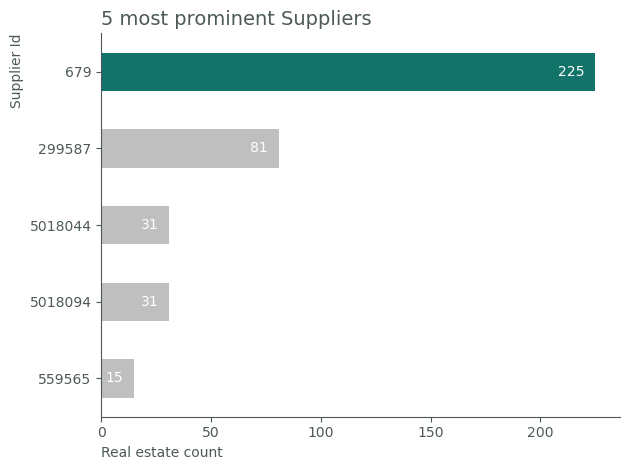

In [27]:
vs = df['personId'].value_counts()
top_5 = vs.head(5).sort_values(ascending=True)
mix = [color5 , color5, color5, color5, color1]   
top_5.plot(kind='barh', color=mix)

# Add value labels to the bars
for index, value in enumerate(top_5):
    plt.text(value - 5, index, str(value), va='center', ha='right', color='white')

# Labels and Title
plt.title('5 most prominent Suppliers', size=14, loc='left', color=color4)
plt.xlabel('Real estate count', loc='left', color=color4)
plt.ylabel('Supplier Id', loc='top', color=color4)

# Layout
plt.gca().tick_params(axis='x', colors=color4)
plt.gca().tick_params(axis='y', colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

plt.tight_layout()
plt.show()

In [28]:
person_679 = df[df['personId'] == 679] # Create a dataframe for the owner
# for column in person_679.columns:
#     print(column)
#     print(person_679[column].describe())
#     print(person_679[column].value_counts())

### The property owner ID: 679
The property owner appears to be operating commercially, with a portfolio in this dataset that exclusively consists of flats and a single hobby room. The top three cities with the most properties are Basel (21), St. Gallen (17), and Fribourg (10). On average, the rent is CHF 1649, with the lowest being CHF 150 for the hobby room and the highest reaching CHF 4800.

The average living area is 82.5 m², ranging from 20 m² to 167 m². The price per square meter averages at CHF 23.83, with a minimum of CHF 12.79 and a maximum of CHF 50.47. Additional costs average around CHF 253.

Most of the flats are located on the first floor or higher. The number of rooms typically starts from 2.5 and goes up. Tenants are allowed to keep pets. The owner leans towards older properties, with an average construction year of 1974, although 67 of the 225 buildings are new. The average renovation year is 2010, indicating that the properties are modern despite their age.

On average, these properties are situated about 500m from kindergartens, 1km from primary schools, and 250m from public transport. Most properties offer either a garage or parking space. Additionally, the majority of the properties feature a balcony, cable TV, and are child-friendly.

In [29]:
person_679['rentNet'].min()
find(person_679, 'rentNet', 560)
person_679 = person_679[person_679['type'] != 'HOBBY_ROOM'] # excluding the hobby room 

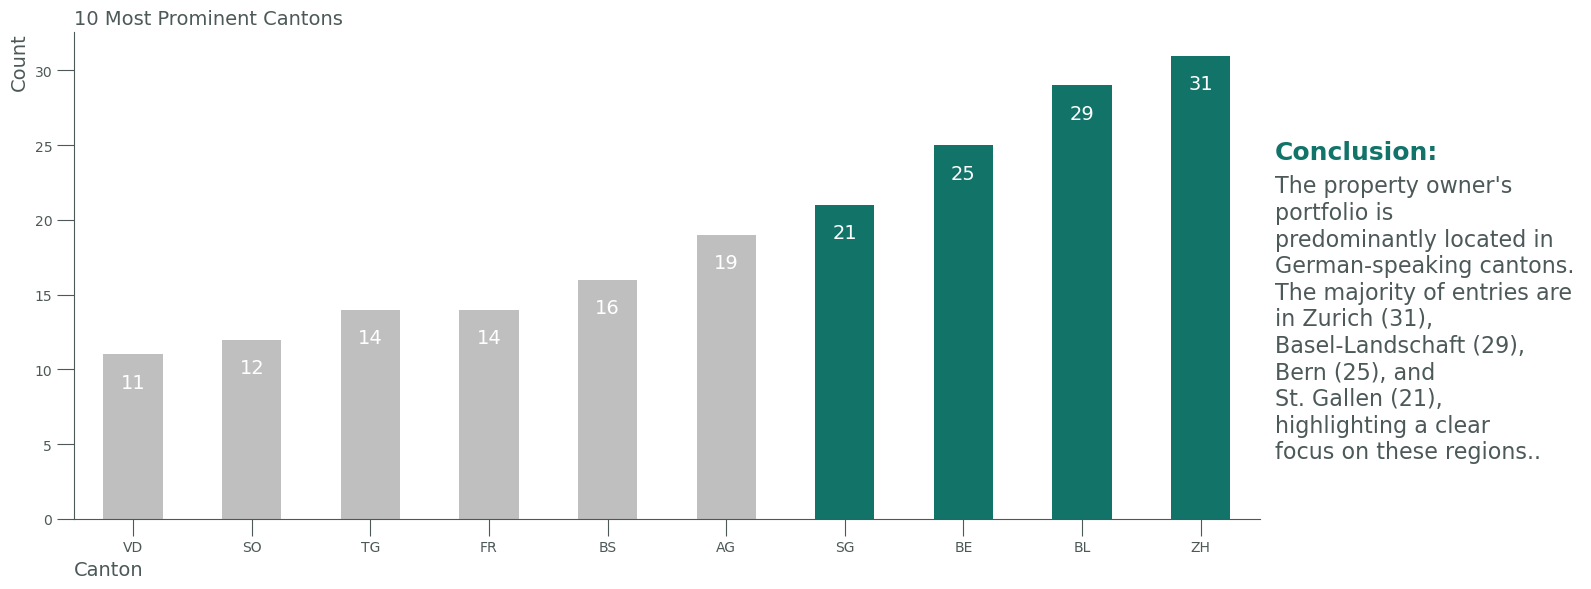

In [30]:
# Plot top 3 cantons
vs = person_679['canton'].value_counts()
mix = [color5, color5, color5, color5, color5, color5, color1, color1, color1, color1]
top_10 = vs.head(10).sort_values(ascending=True)

plt.figure(figsize=(16, 6))

top_10.plot(kind='bar', color=mix)

# Add values inside the bars
for index, value in enumerate(top_10):
    plt.text(index, value - 2.5 , str(value), va='bottom', ha='center', color='white', size=14)

# Labels and Title
plt.title('10 Most Prominent Cantons', size=14, loc='left', color=color4)
plt.xlabel('Canton', size=14, loc='left', color=color4, rotation=0)
plt.ylabel('Count', size=14, loc='top', color=color4)

# Layout
plt.gca().tick_params(axis='x', size=12,rotation=0, colors=color4)
plt.gca().tick_params(axis='y', size=12, colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

conclusion_title = 'Conclusion:'
conclusion = '''The property owner's portfolio is 
predominantly located in 
German-speaking cantons. 
The majority of entries are 
in Zurich (31), 
Basel-Landschaft (29), 
Bern (25), and 
St. Gallen (21), 
highlighting a clear 
focus on these regions..
'''
# Add description
plt.figtext(0.8, 0.725, conclusion_title, wrap=True, horizontalalignment='left', fontsize=18, weight='bold', color=color1)
plt.figtext(0.8, 0.1875, conclusion, wrap=True, horizontalalignment='left', fontsize=16, color=color4)

plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space for description
plt.show()

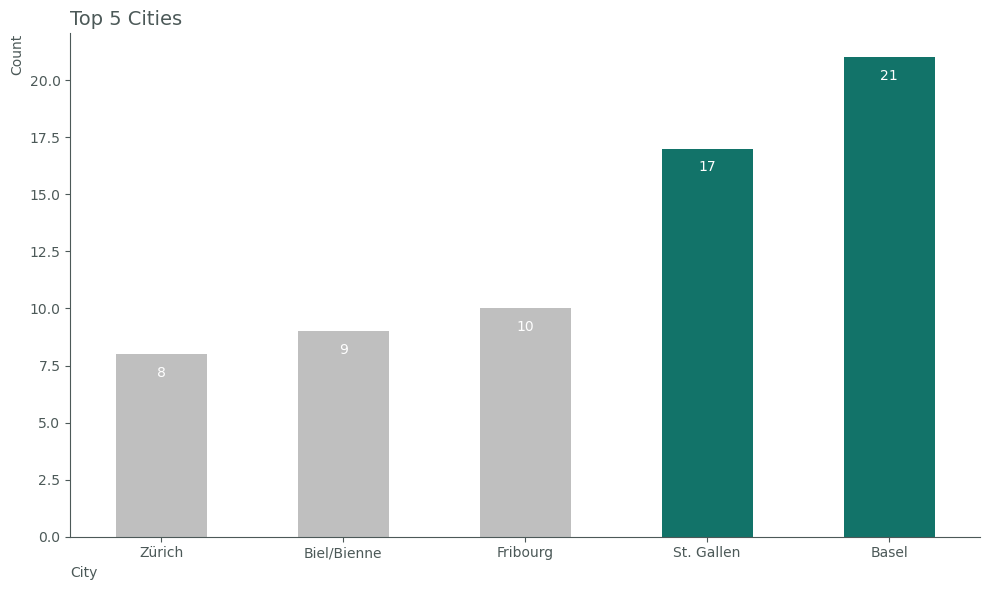

In [31]:
# Plot top 5 cities
vs = person_679['city'].value_counts()
top_5 = vs.head(5).sort_values(ascending=True)
mix = [color5, color5, color5, color1, color1]   

plt.figure(figsize=(10, 6))

top_5.plot(kind='bar', color=mix)

# Add value text to bars
for index, value in enumerate(top_5):
    plt.text(index, value -0.5 , str(value), va='top', ha='center', color='white') # xxxx

# Label and Title
plt.title('Top 5 Cities', size=14, loc='left', color=color4)
plt.xlabel('City', loc='left', color=color4)
plt.ylabel('Count', loc='top', color=color4)

# Layout
plt.gca().tick_params(axis='x', colors=color4, rotation=0)
plt.gca().tick_params(axis='y', colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

plt.tight_layout()

plt.show()

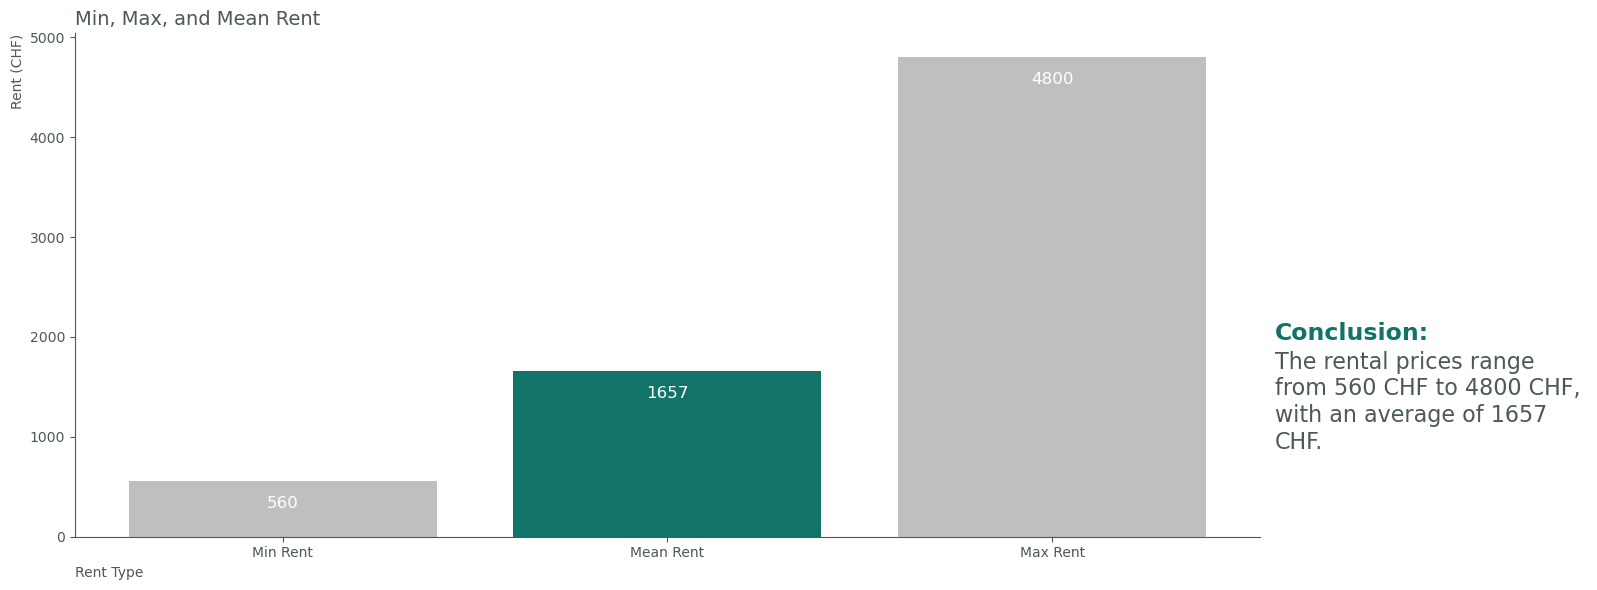

In [32]:
# Plot min, max, mean rent
min_rent = round(person_679['rentNet'].min())
max_rent = round(person_679['rentNet'].max())
mean_rent = round(person_679['rentNet'].mean())

# Data to plot
rent_values = [min_rent, mean_rent, max_rent]
rent_labels = ['Min Rent', 'Mean Rent', 'Max Rent']

# Colors
mix = [color5, color1, color5]

plt.figure(figsize=(16, 6))

plt.bar(rent_labels, rent_values, color=mix)

# Add value text to bars
for index, value in enumerate(rent_values):
    plt.text(index, value - 150, str(value), va='top', ha='center', color='white', size=12)
    
# Labels and Title
plt.title('Min, Max, and Mean Rent', size=14, loc='left', color=color4)
plt.xlabel('Rent Type', loc='left', color=color4)
plt.ylabel('Rent (CHF)', loc='top', color=color4)

# Layout
plt.gca().tick_params(axis='x', colors=color4)
plt.gca().tick_params(axis='y', colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

# Sets the y-value of the axis to zero
plt.ylim(bottom=0)

conclusion_title = 'Conclusion:'
conclusion = f'''The rental prices range 
from {min_rent} CHF to {max_rent} CHF, 
with an average of {mean_rent} CHF.'''

# Add description
plt.figtext(0.8, 0.425, conclusion_title, wrap=True, horizontalalignment='left', fontsize=17, weight='bold', color=color1)
plt.figtext(0.8, 0.25, conclusion, wrap=True, horizontalalignment='left', fontsize=16, color=color4)

plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space for the description
plt.show()

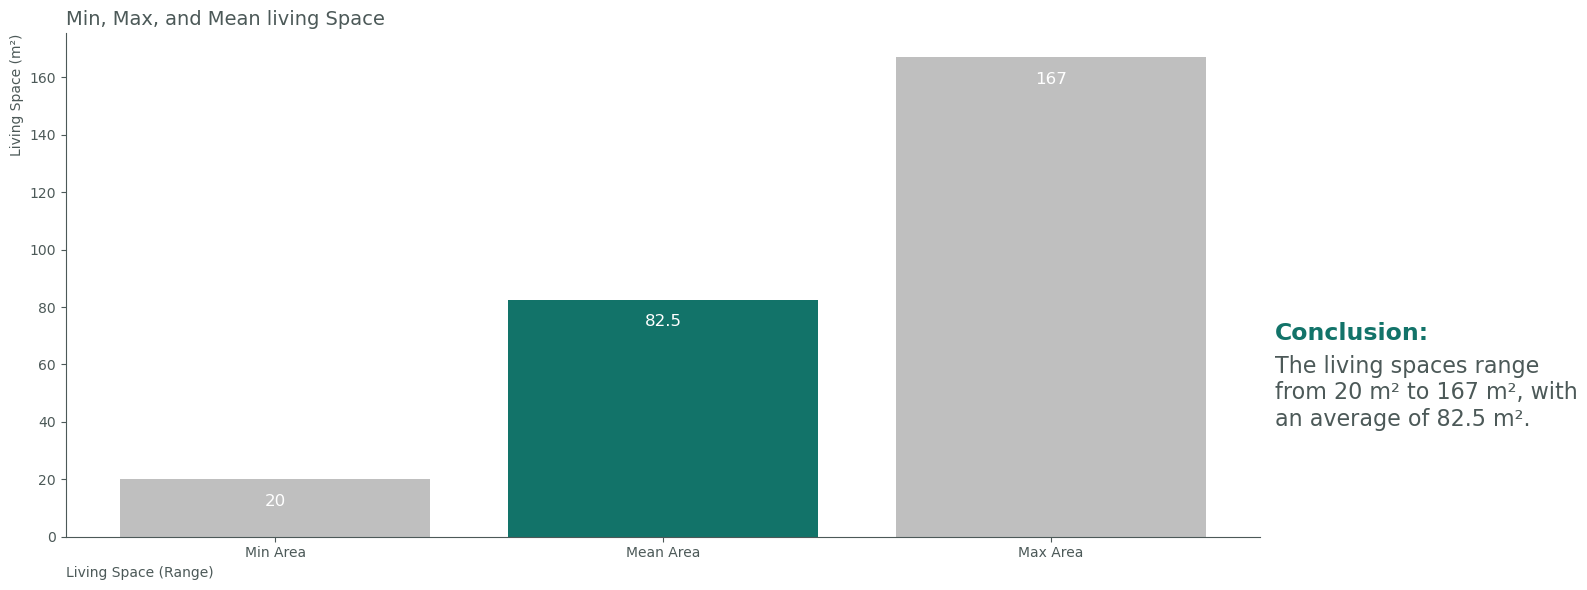

In [33]:
# Plot min, max, mean m2 of living area
min_area = round(person_679['livingSpace'].min())
max_area = round(person_679['livingSpace'].max())
mean_area = person_679['livingSpace'].mean()
mean_area = round(mean_area, 1)

# Data to plot
area_values = [min_area, mean_area, max_area]
area_labels = ['Min Area', 'Mean Area', 'Max Area']

# Colors
mix = [color5, color1, color5]

plt.figure(figsize=(16, 6))

plt.bar(area_labels, area_values, color=mix)

# Add value text to bars
for index, value in enumerate(area_values):
    plt.text(index, value - 5, str(value), va='top', ha='center', color='white', size=12)
    
# Labels and Title
plt.title('Min, Max, and Mean living Space', size=14, loc='left', color=color4)
plt.xlabel('Living Space (Range)', loc='left', color=color4)
plt.ylabel('Living Space (m²)', loc='top', color=color4)

# Layout
plt.gca().tick_params(axis='x', colors=color4)
plt.gca().tick_params(axis='y', colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

# Sets the y-value of the axis to zero
plt.ylim(bottom=0)

conclusion_title = 'Conclusion:'
conclusion = f'The living spaces range from {min_area} m² to {max_area} m², with an average of {mean_area} m².'

# Add description
plt.figtext(0.8, 0.425, conclusion_title, wrap=True, horizontalalignment='left', fontsize=17, weight='bold', color=color1)
plt.figtext(0.8, 0.2875, conclusion, wrap=True, horizontalalignment='left', fontsize=16, color=color4)

plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space for the description
plt.show()


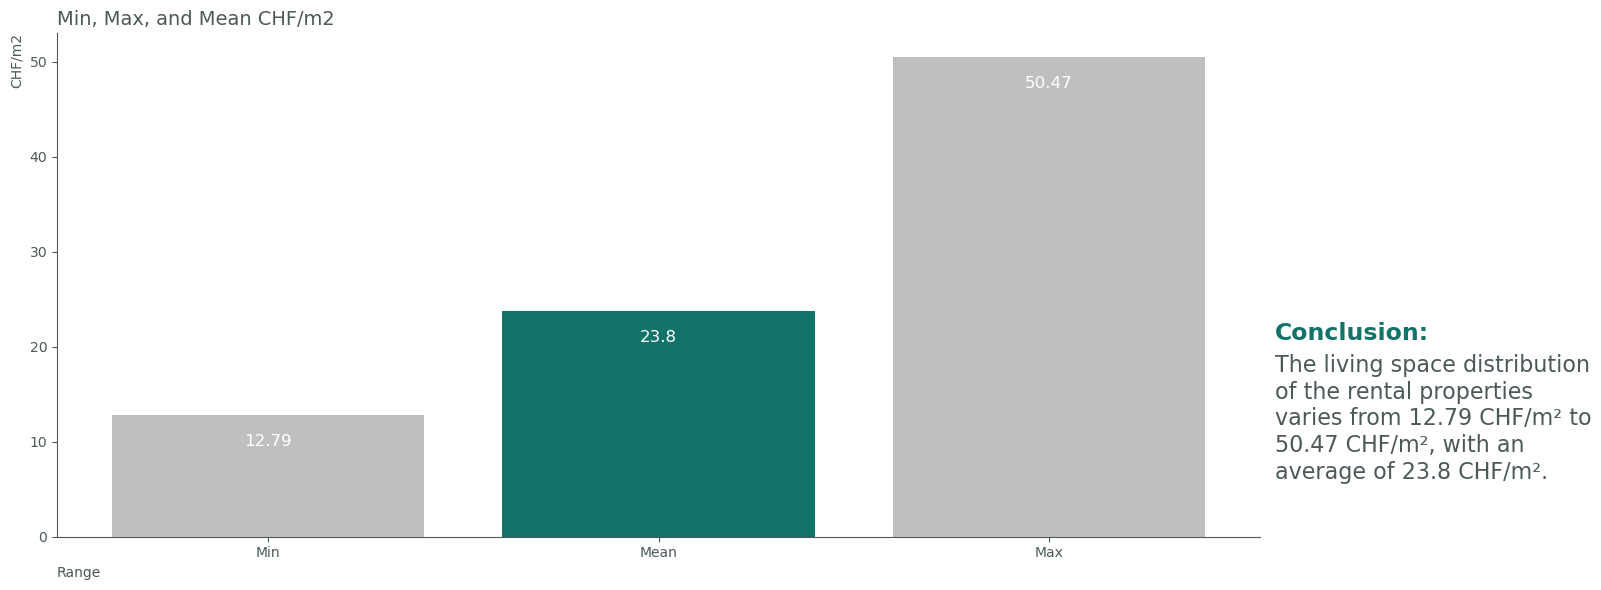

In [34]:
# Plot min, max, mean price per square meter
min_CHFm2 = person_679['CHF/m2'].min()
max_CHFm2 = person_679['CHF/m2'].max()
mean_CHFm2 = person_679['CHF/m2'].mean()
mean_CHFm2 = round(mean_CHFm2, 1)

# Data to plot
price_values = [min_CHFm2, mean_CHFm2, max_CHFm2]
price_labels = ['Min', 'Mean', 'Max']

# Colors
mix = [color5, color1, color5]

plt.figure(figsize=(16, 6))

plt.bar(price_labels, price_values, color=mix)

# Add value text to bars
for index, value in enumerate(price_values):
    plt.text(index, value - 2, str(value), va='top', ha='center', color='white', size=12)
    
# Labels and Title
plt.title('Min, Max, and Mean CHF/m2', size=14, loc='left', color=color4)
plt.xlabel('Range', loc='left', color=color4)
plt.ylabel('CHF/m2', loc='top', color=color4)

# Layout
plt.gca().tick_params(axis='x', colors=color4)
plt.gca().tick_params(axis='y', colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

# Sets the y-value of the axis to zero
plt.ylim(bottom=0)

conclusion_title = 'Conclusion:'
conclusion = f'''The living space distribution of the rental properties varies from {min_CHFm2} CHF/m² to {max_CHFm2} CHF/m², with an average of {mean_CHFm2} CHF/m².'''
# Add description
plt.figtext(0.8, 0.425, conclusion_title, wrap=True, horizontalalignment='left', fontsize=17, weight='bold', color=color1)
plt.figtext(0.8, 0.2, conclusion, wrap=True, horizontalalignment='left', fontsize=16, color=color4)

plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space for the description
plt.show()

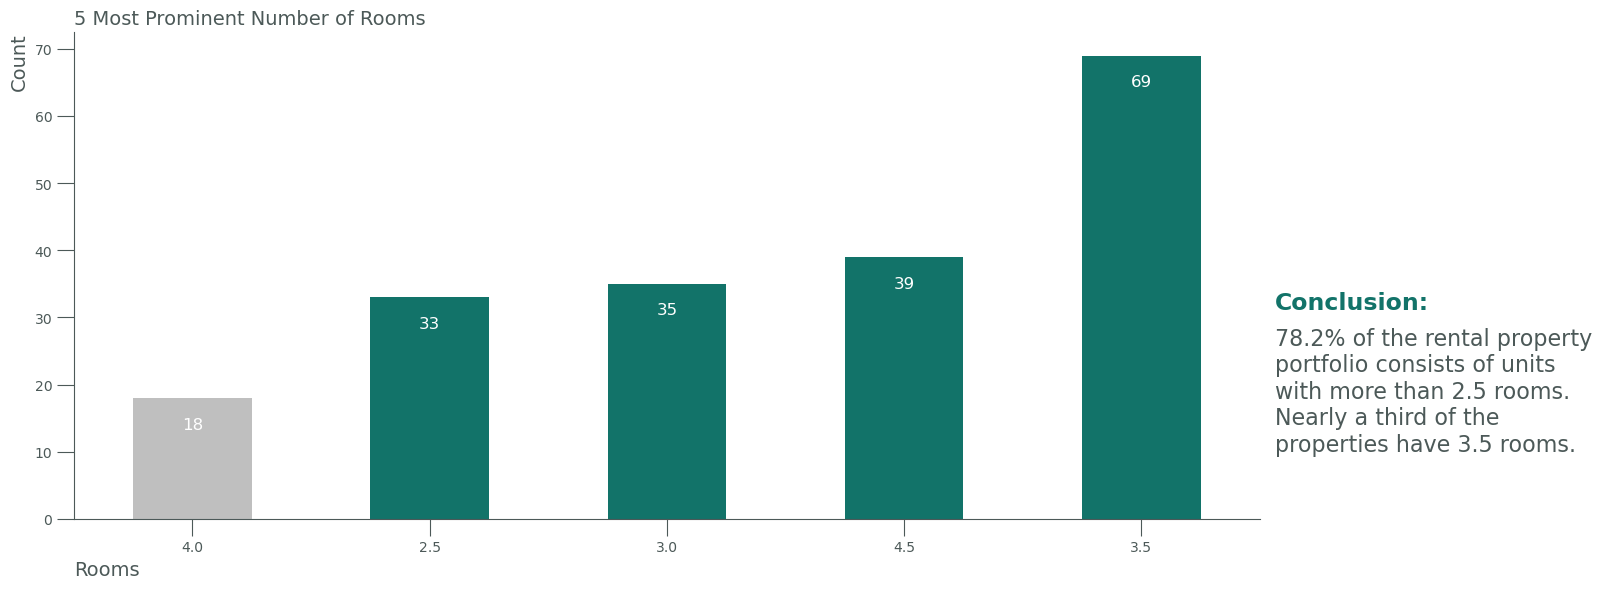

In [35]:
# plot top 5 value counts of number of rooms
vs = person_679['numberOfRooms'].value_counts()
mix = [color5, color1, color1, color1, color1]
top_5 = vs.head(5).sort_values(ascending=True)

plt.figure(figsize=(16, 6))

top_5.plot(kind='bar', color=mix)

# Add value text in bars
for index, value in enumerate(top_5):
    plt.text(index, value - 5 , str(value), va='bottom', ha='center', color='white', size=12)

# Labels and Title
plt.title('5 Most Prominent Number of Rooms', size=14, loc='left', color=color4)
plt.xlabel('Rooms', size=14, loc='left', color=color4, rotation=0)
plt.ylabel('Count', size=14, loc='top', color=color4)

# Layout
plt.gca().tick_params(axis='x', size=12,rotation=0, colors=color4)
plt.gca().tick_params(axis='y', size=12, colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

conclusion_title = 'Conclusion:'
conclusion = '''78.2% of the rental property portfolio consists of units with more than 2.5 rooms. Nearly a third of the properties have 3.5 rooms.
'''
# Add description
plt.figtext(0.8, 0.475, conclusion_title, wrap=True, horizontalalignment='left', fontsize=17, weight='bold', color=color1)
plt.figtext(0.8, 0.2, conclusion, wrap=True, horizontalalignment='left', fontsize=16, color=color4)

plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space for the description
plt.show()

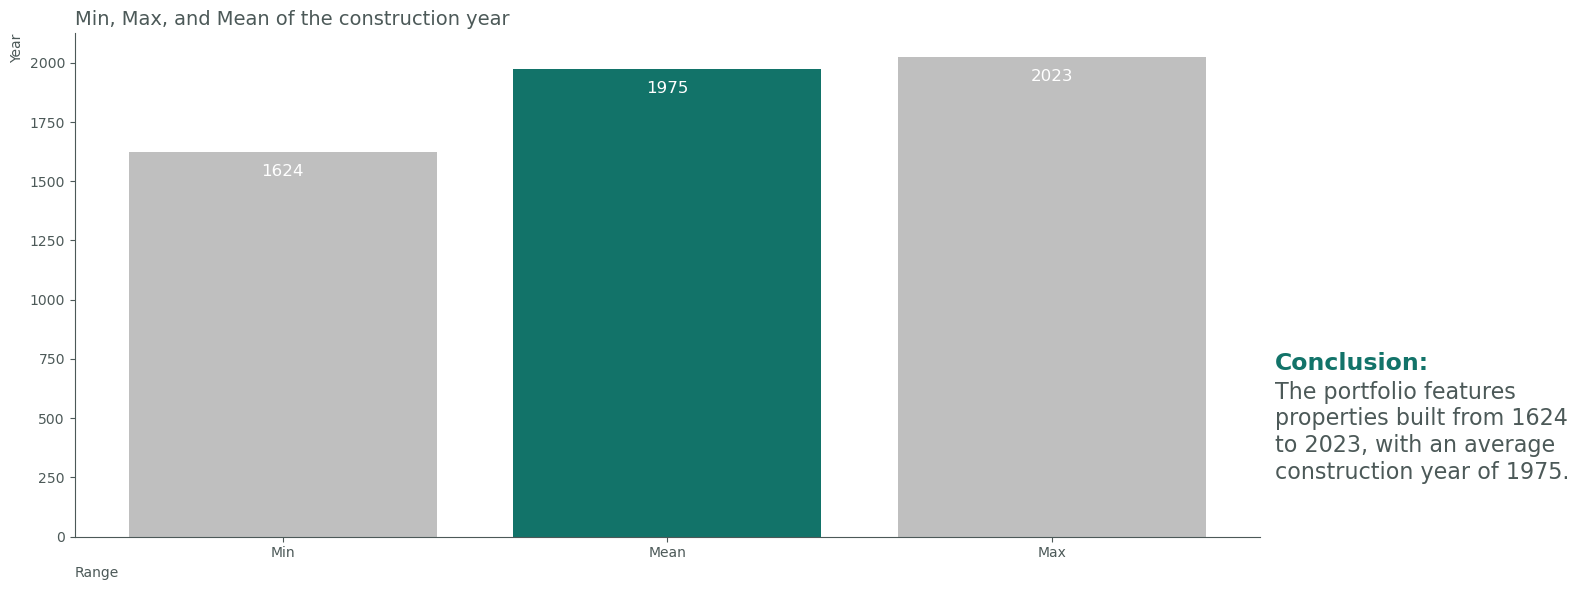

In [36]:
# Plot average year of construction
min_yearBuilt = round(person_679['yearBuilt'].min())
max_yearBuilt = round(person_679['yearBuilt'].max())
mean_yearBuilt = round(person_679['yearBuilt'].mean())

# Data to plot
built_values = [min_yearBuilt, mean_yearBuilt, max_yearBuilt]
built_labels = ['Min', 'Mean', 'Max']

# Colors
mix = [color5, color1, color5]

plt.figure(figsize=(16, 6))

plt.bar(built_labels, built_values, color=mix)

# Add value text to bars
for index, value in enumerate(built_values):
    plt.text(index, value - 50, str(value), va='top', ha='center', color='white', size=12)
    
# Labels and Title
plt.title('Min, Max, and Mean of the construction year', size=14, loc='left', color=color4)
plt.xlabel('Range', loc='left', color=color4)
plt.ylabel('Year', loc='top', color=color4)

# Layout
plt.gca().tick_params(axis='x', colors=color4)
plt.gca().tick_params(axis='y', colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

# Sets the y-value of the axis to zero
plt.ylim(bottom=0)

conclusion_title = 'Conclusion:'
conclusion = f'The portfolio features properties built from {min_yearBuilt} to {max_yearBuilt}, with an average construction year of {mean_yearBuilt}.'

# Add description
plt.figtext(0.8, 0.375, conclusion_title, wrap=True, horizontalalignment='left', fontsize=17, weight='bold', color=color1)
plt.figtext(0.8, 0.2, conclusion, wrap=True, horizontalalignment='left', fontsize=16, color=color4)

plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space for description
plt.show()


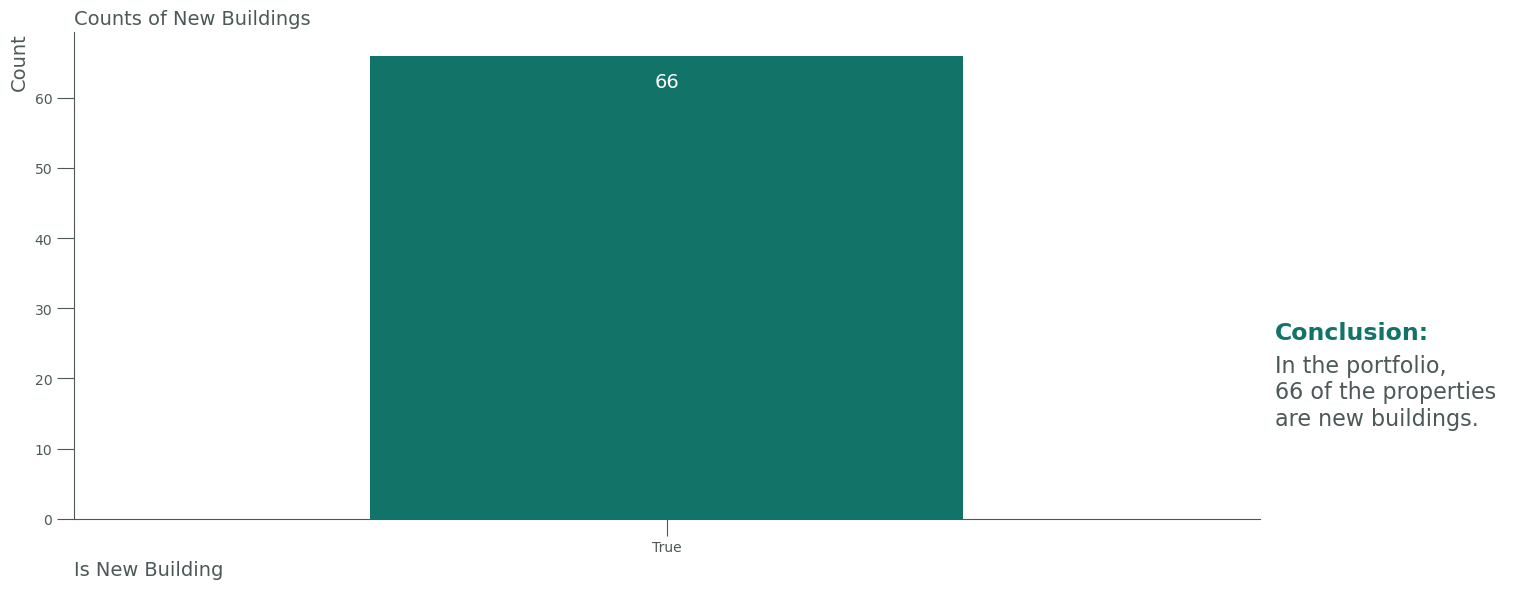

In [37]:
# Plot the new buildings
vs = person_679['isNewBuilding'].value_counts()

plt.figure(figsize=(16, 6))

vs.plot(kind='bar', color=color1)

# Add value text into the bars
for index, value in enumerate(vs):
    plt.text(index, value - 5, str(value), va='bottom', ha='center', color='white', size=14)

# Labels and Title
plt.title('Counts of New Buildings', size=14, loc='left', color=color4)
plt.xlabel('Is New Building', size=14, loc='left', color=color4, rotation=0)
plt.ylabel('Count', size=14, loc='top', color=color4)

# Layout
plt.gca().tick_params(axis='x', size=12, rotation=0, colors=color4)
plt.gca().tick_params(axis='y', size=12, colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

conclusion_title = 'Conclusion:'
conclusion = '''In the portfolio, 
66 of the properties 
are new buildings.'''

# Add description
plt.figtext(0.8, 0.425, conclusion_title, wrap=True, horizontalalignment='left', fontsize=17, weight='bold', color=color1)
plt.figtext(0.8, 0.2875, conclusion, wrap=True, horizontalalignment='left', fontsize=16, color=color4)

# Plot anzeigen
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave Space for description
plt.show()


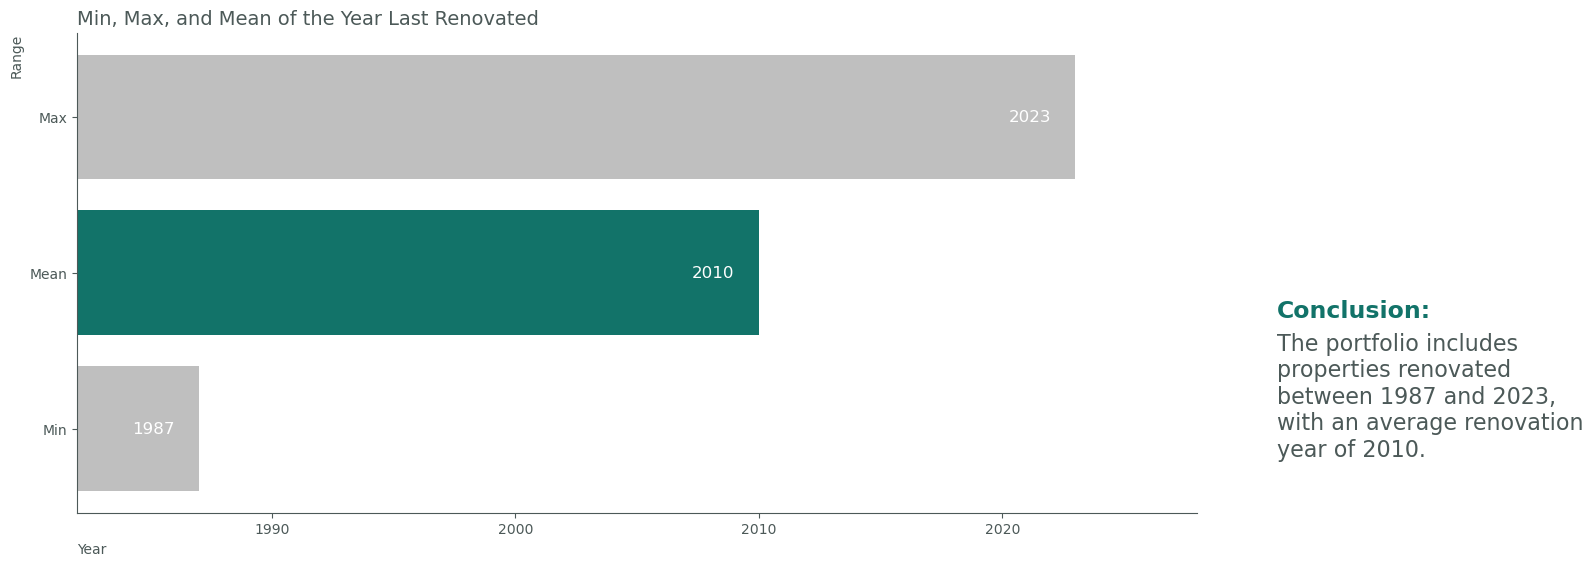

In [38]:
# Plot average year of renovation
min_yearLastRenovated = round(person_679['yearLastRenovated'].min())
max_yearLastRenovated = round(person_679['yearLastRenovated'].max())
mean_yearLastRenovated = round(person_679['yearLastRenovated'].mean())

# Data to plot
renovated_values = [min_yearLastRenovated, mean_yearLastRenovated, max_yearLastRenovated]
renovated_labels = ['Min', 'Mean', 'Max']

# Colors
mix = [color5, color1, color5]

plt.figure(figsize=(16, 6))

# Create a horizontal bar chart
plt.barh(renovated_labels, renovated_values, color=mix)

# Add value text to bars
for index, value in enumerate(renovated_values):
    plt.text(value - 1, index, str(value), va='center', ha='right', color='white', size=12)

# Labels and Title
plt.title('Min, Max, and Mean of the Year Last Renovated', size=14, loc='left', color=color4)
plt.xlabel('Year', loc='left', color=color4)
plt.ylabel('Range', loc='top', color=color4)

# Adjust x-axis limits to make differences more obvious
plt.xlim(min_yearLastRenovated - 5, max_yearLastRenovated + 5)

# Layout
plt.gca().tick_params(axis='x', colors=color4)
plt.gca().tick_params(axis='y', colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

conclusion_title = 'Conclusion:'
conclusion = f'''The portfolio includes properties renovated between {min_yearLastRenovated} and {max_yearLastRenovated}, with an average renovation year of {mean_yearLastRenovated}.'''
# Add description
plt.figtext(0.8, 0.425, conclusion_title, wrap=True, horizontalalignment='left', fontsize=17, weight='bold', color=color1)
plt.figtext(0.8, 0.2, conclusion, wrap=True, horizontalalignment='left', fontsize=16, color=color4)

# Adjust layout to leave space for the description
plt.subplots_adjust(left=0.05, right=0.75, top=0.9, bottom=0.1)
plt.show()


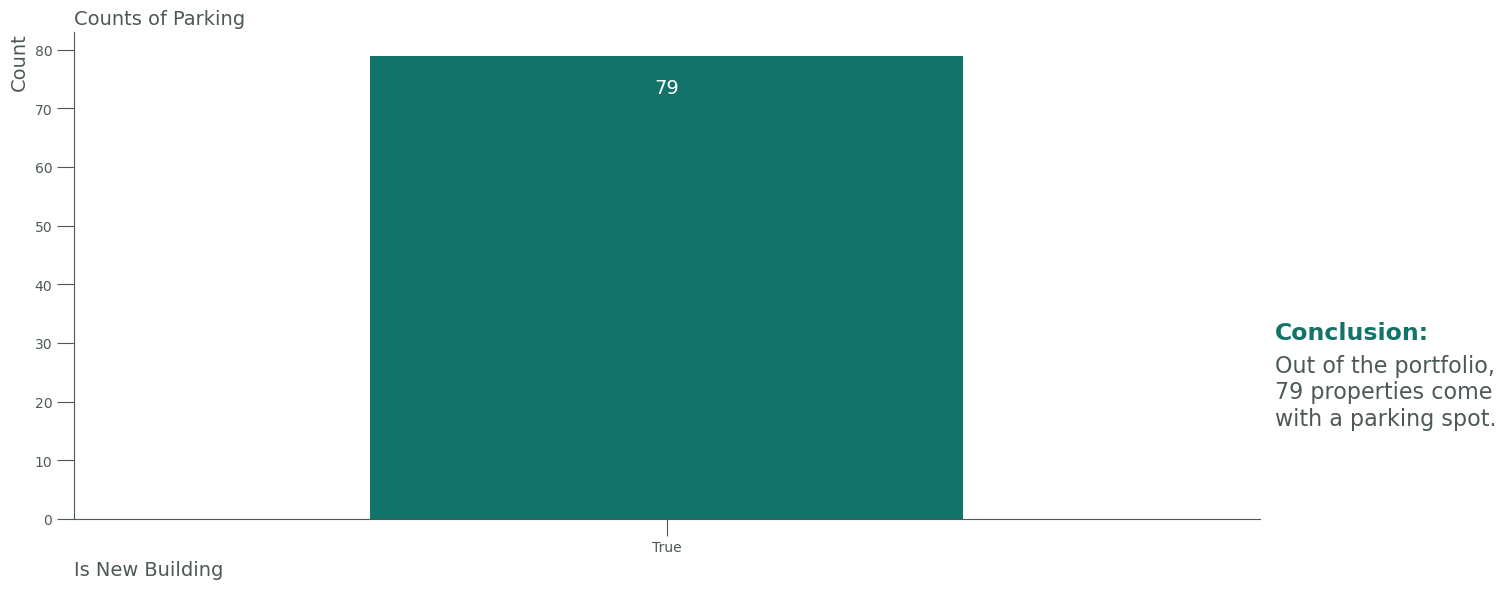

In [39]:
# Plot parking
vs = person_679['hasParking'].value_counts()

plt.figure(figsize=(16, 6))

vs.plot(kind='bar', color=color1)

# Add value text into bars
for index, value in enumerate(vs):
    plt.text(index, value - 7, str(value), va='bottom', ha='center', color='white', size=14)

# Label and Title
plt.title('Counts of Parking', size=14, loc='left', color=color4)
plt.xlabel('Is New Building', size=14, loc='left', color=color4, rotation=0)
plt.ylabel('Count', size=14, loc='top', color=color4)

# Layout
plt.gca().tick_params(axis='x', size=12, rotation=0, colors=color4)
plt.gca().tick_params(axis='y', size=12, colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

conclusion_title = 'Conclusion:'
conclusion = '''Out of the portfolio, 
79 properties come 
with a parking spot.'''

# Add description
plt.figtext(0.8, 0.425, conclusion_title, wrap=True, horizontalalignment='left', fontsize=17, weight='bold', color=color1)
plt.figtext(0.8, 0.2875, conclusion, wrap=True, horizontalalignment='left', fontsize=16, color=color4)

plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave space for description
plt.show()


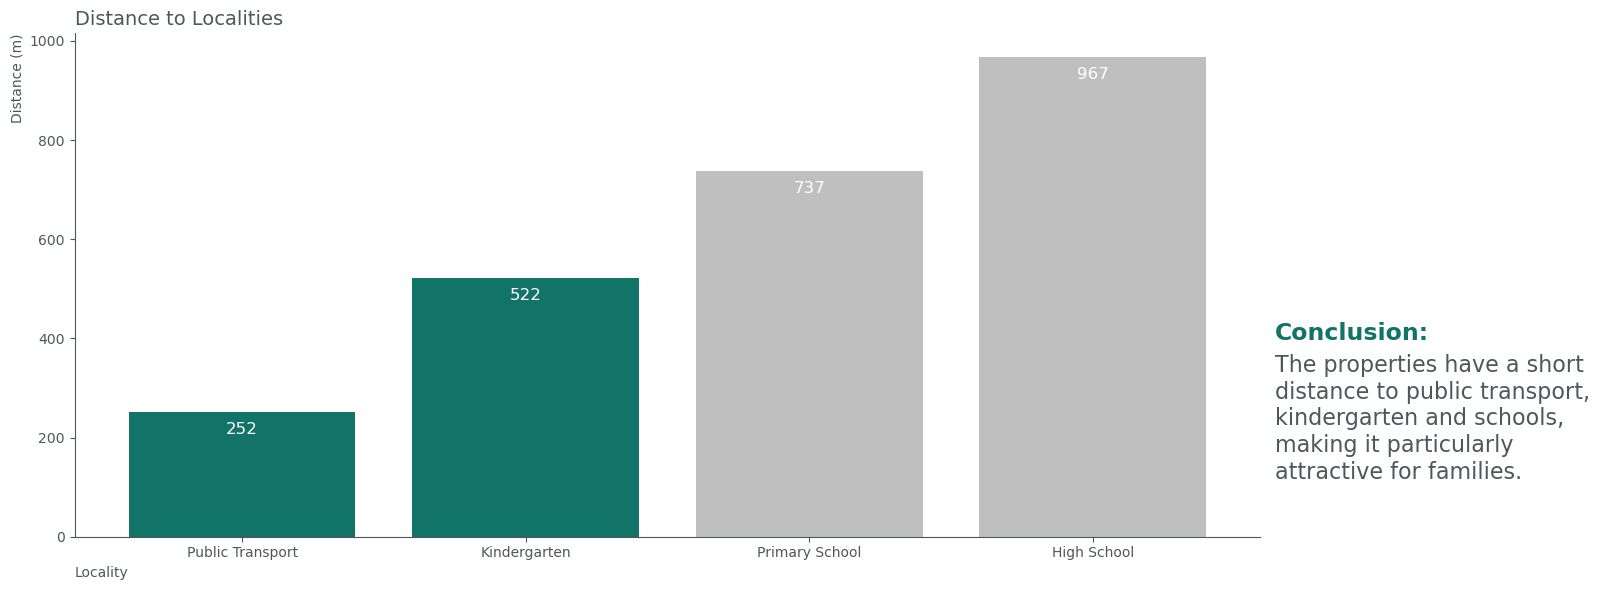

In [40]:
# Plot average distance kindergarten, primary school and public transport
mean_distancePublicTransport = round(person_679['distancePublicTransport'].mean())
mean_distancePrimarySchool = round(person_679['distancePrimarySchool'].mean())
mean_distanceKindergarten = round(person_679['distanceKindergarten'].mean())
mean_distanceHighSchool = round(person_679['distanceHighSchool'].mean())

# Data to plot 
renovated_values = [mean_distancePublicTransport, 
                    mean_distanceKindergarten, 
                    mean_distancePrimarySchool, 
                    mean_distanceHighSchool
                   ]

renovated_labels = ['Public Transport', 'Kindergarten', 'Primary School', 'High School']

plt.figure(figsize=(16, 6))

plt.bar(renovated_labels, renovated_values, color=[color1, color1, color5, color5, color5])

# Add value text to bars
for index, value in enumerate(renovated_values):
    plt.text(index, value - 20, str(value), va='top', ha='center', color='white', size=12)
    
# Title and Labels
plt.title('Distance to Localities', size=14, loc='left', color=color4)
plt.xlabel('Locality', loc='left', color=color4)
plt.ylabel('Distance (m)', loc='top', color=color4)

# Layout
plt.gca().tick_params(axis='x', colors=color4)
plt.gca().tick_params(axis='y', colors=color4)
plt.gca().spines['bottom'].set_color(color4)
plt.gca().spines['left'].set_color(color4)
sns.despine()

# Sets the y-value of the axis to zero
plt.ylim(bottom=0)

conclusion_title = 'Conclusion:'
conclusion = f'The properties have a short distance to public transport, kindergarten and schools, making it particularly attractive for families.'

# Add description
plt.figtext(0.8, 0.425, conclusion_title, wrap=True, horizontalalignment='left', fontsize=17, weight='bold', color=color1)
plt.figtext(0.8, 0.2, conclusion, wrap=True, horizontalalignment='left', fontsize=16, color=color4)

plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave spave for description
plt.show()

## Save report

In [41]:
import shutil

# Save the content as a text file
content = """
### A Detailed Look at the Swiss Rental Property Market

#### Introduction

The data collected from Immoscout24.ch offers an insightful overview of the rental property market in Switzerland. This analysis aims to uncover key trends and features, providing valuable insights for potential investors, property managers, and stakeholders.

#### Property Types and Locations

The dataset comprises 1,000 rental properties, predominantly apartments. The most common type is 'APARTMENT, FLAT', which accounts for 649 listings. Other notable types include 'DUPLEX', 'ROOF FLAT', and 'ATTIC FLAT'. Interestingly, the market also features a small number of houses, such as 'SINGLE HOUSE' and 'BIFAMILIAR HOUSE', albeit in much lower quantities.

**Key Locations:**
- **Zurich** leads with 54 properties, reflecting its status as a major urban center.
- **St. Gallen** and **Basel** follow closely, each with 37 properties.
- **Bern** and **Crissier** round out the top five cities, demonstrating a spread across various cantons.

#### Rent and Living Space

The analysis reveals significant insights into rental prices and living space availability:

- **Net Rent**: The average net rent stands at CHF 1,890.30, with a wide range from CHF 0 to CHF 10,000.
- **Gross Rent**: Averaging CHF 2,150.08, gross rents also show substantial variability, reaching up to CHF 10,500.
- **Living Space**: Properties offer an average living space of 93 sqm, ranging from compact units of 3 sqm to spacious accommodations of 330 sqm.

#### Building Characteristics and Amenities

The properties exhibit a mix of modern and older buildings:
- **Year Built**: A notable concentration of properties is built recently, particularly in 2024. However, there are also older structures dating back to 1624, reflecting the rich architectural diversity in Switzerland.
- **Renovations**: Many older buildings have undergone recent renovations, with 2024 being a prominent year for upgrades.

**Common Amenities:**
- **Garages**: Available in 460 properties.
- **Parking Spaces**: Offered in 426 properties.
- **Balconies**: A feature in 628 properties.
- **Elevators**: Present in 518 properties, highlighting accessibility.

#### Accessibility and Community Features

The data also provides insights into community and accessibility features:
- **Pets Allowed**: 390 properties are pet-friendly.
- **Child-Friendly**: 397 properties cater to families with children.
- **Flat Sharing**: Only 3 properties are listed for flat sharing, indicating a niche market.

#### Proximity to Key Locations

Proximity to essential services is a critical factor for renters. The dataset includes average distances to key locations:
- **High Schools**: Average distance is approximately 962 meters.
- **Kindergartens**: Average distance is around 526 meters.
- **Primary Schools**: Average distance is about 731 meters.
- **Motorways**: Average distance is 5,497 meters.
- **Public Transport**: Conveniently located with an average distance of 242 meters.

#### Additional Costs

Additional costs, such as maintenance fees, average CHF 257.53, with a maximum of CHF 5,600, providing a comprehensive view of potential expenses beyond rent.

### Conclusion

This analysis of the Swiss rental property market highlights a diverse range of rental properties, predominantly apartments, with significant variations in rent, living space, and amenities. Major cities like Zurich, St. Gallen, and Basel feature prominently, offering modern, well-equipped properties. The data provides valuable insights for stakeholders looking to navigate and invest in this dynamic market, emphasizing the importance of location, building characteristics, and community features in making informed decisions.

By understanding these key aspects, investors and property managers can better meet the needs of renters, ensuring a well-balanced and attractive rental market in Switzerland.
"""

# Define the file path
file_path = 'C:/Users/acer/Documents/immoscraper/Swiss_Rental_Property_Market_Analysis.txt' # Insert your path

# Write the content to the file
with open(file_path, 'w') as file:
    file.write(content)

file_path


'C:/Users/acer/Documents/immoscraper/Swiss_Rental_Property_Market_Analysis.txt'